<a href="https://colab.research.google.com/github/AjengSyifaa/Tugas-Machine-Learning/blob/main/Tugas6_Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bike Sharing**

In [148]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
params = {'legend.fontsize': 'x-large', 'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large', 'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large', 'ytick.labelsize':'x-large'}
sn.set_style('whitegrid')
sn.set_context('talk')
plt.rcParams.update(params)
pd.options.display.max_colwidth = 600
from IPython.display import display, HTML

In [149]:
hour_df = pd.read_csv('/content/hour.csv')
print("Shape of dataset::{}".format(hour_df.shape))
hour_df.head()

Shape of dataset::(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [150]:
hour_df.dtypes

,0
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
hr,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64


In [151]:
hour_df.describe ()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## **Standarisasi Nama Atribut**

In [152]:
hour_df.rename(columns={'instant':'rec_id', 'dteday':'datetime', 'holiday':'is_holiday',
                        'workingday':'is_workingday', 'weathersit':'weather_condition',
                        'hum':'humidity', 'mnth':'month', 'cnt':'total_count',
                        'hr':'hour', 'yr':'year'},inplace=True)

## **Typecast Attributes**

In [153]:
hour_df['datetime'] = pd.to_datetime(hour_df.datetime)

# categorical variables
hour_df['season'] = hour_df.season.astype('category')
hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['weather_condition'] = hour_df.weather_condition.astype('category')
hour_df['is_workingday'] = hour_df.is_workingday.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')

## **Visualisasikan Atribut, Tren, dan Hubungan**

[Text(0.5, 1.0, 'Season wise hourly distribution of counts')]

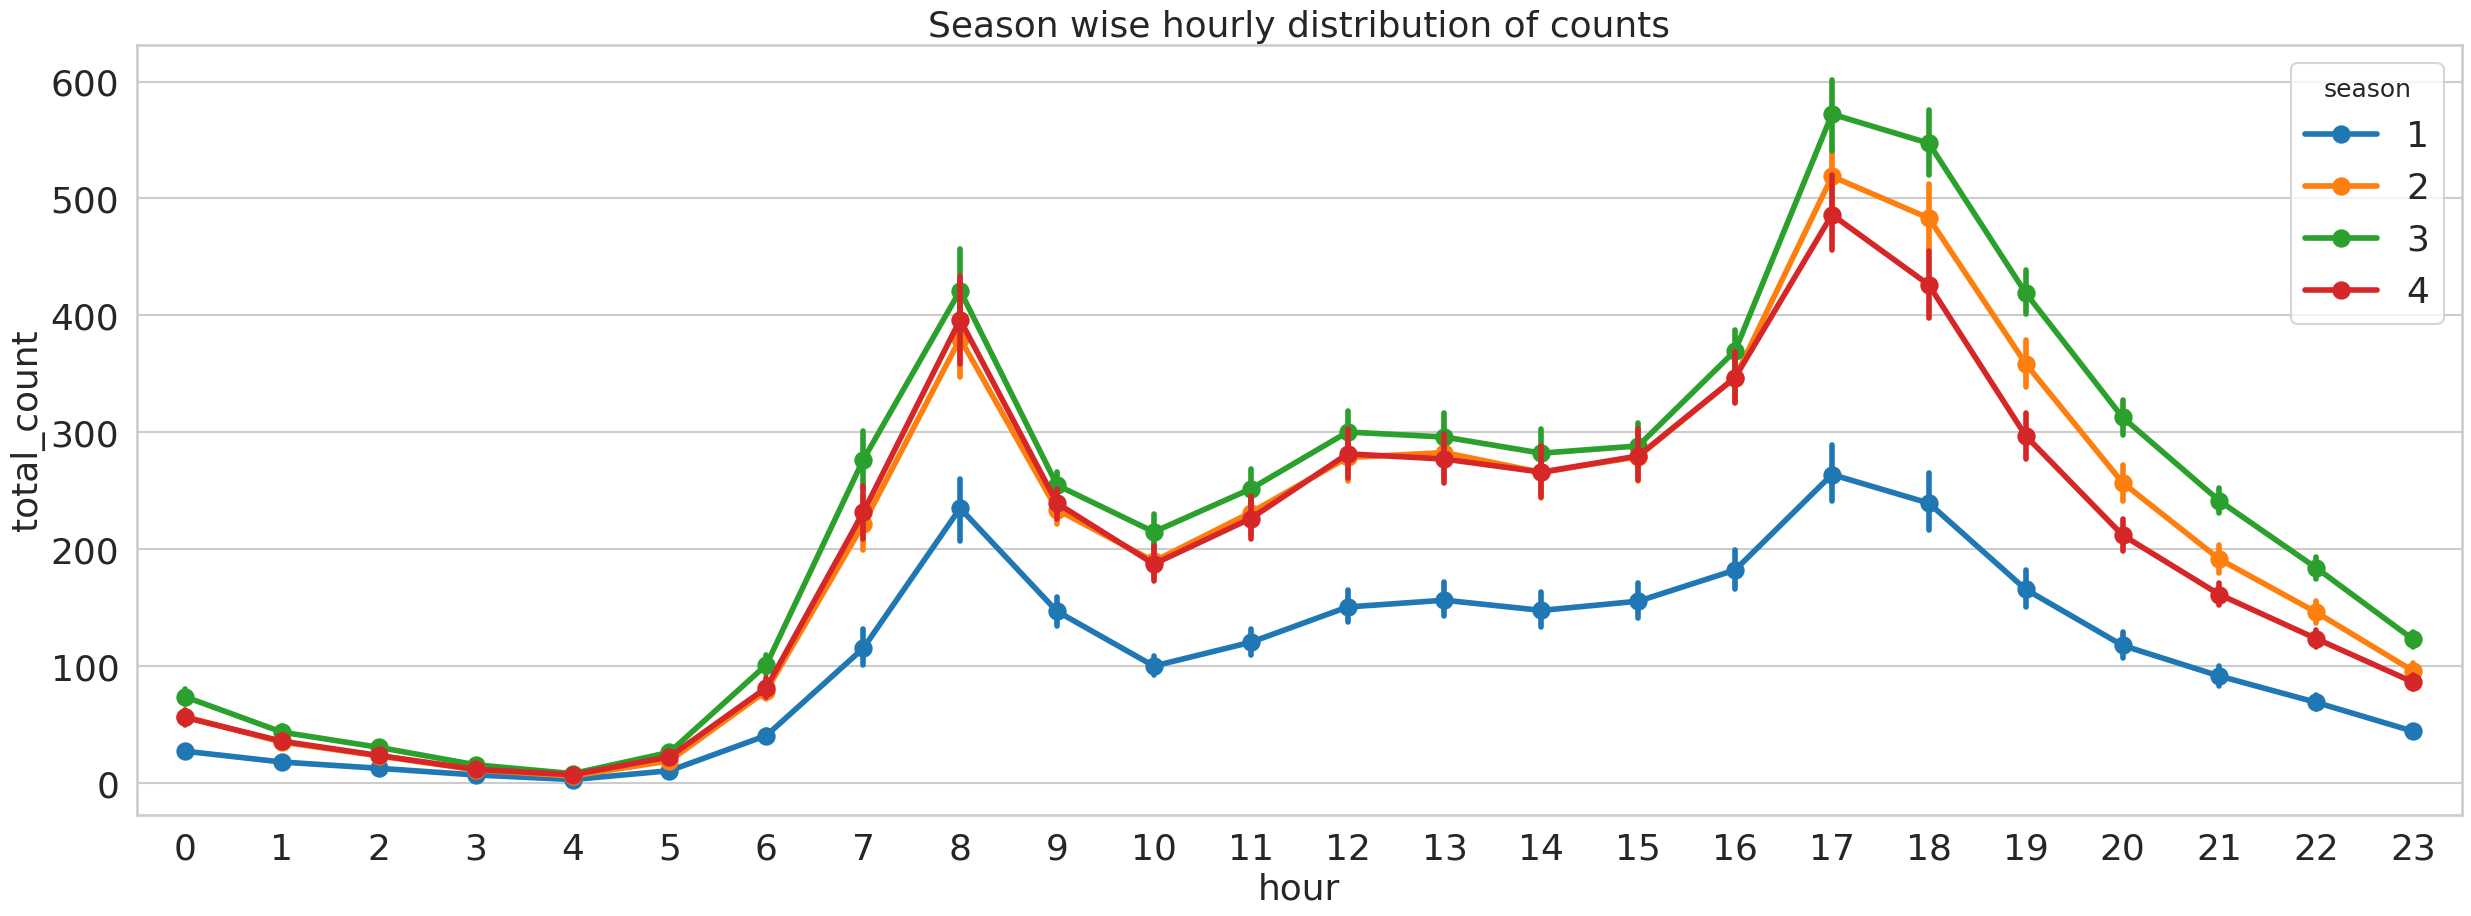

In [154]:
fig,ax = plt.subplots()
sn.pointplot(data=hour_df[['hour', 'total_count', 'season']], x='hour',
             y='total_count', hue='season',ax=ax)
ax.set(title="Season wise hourly distribution of counts")

[Text(0.5, 1.0, 'Weekday wise hourly distribution of counts')]

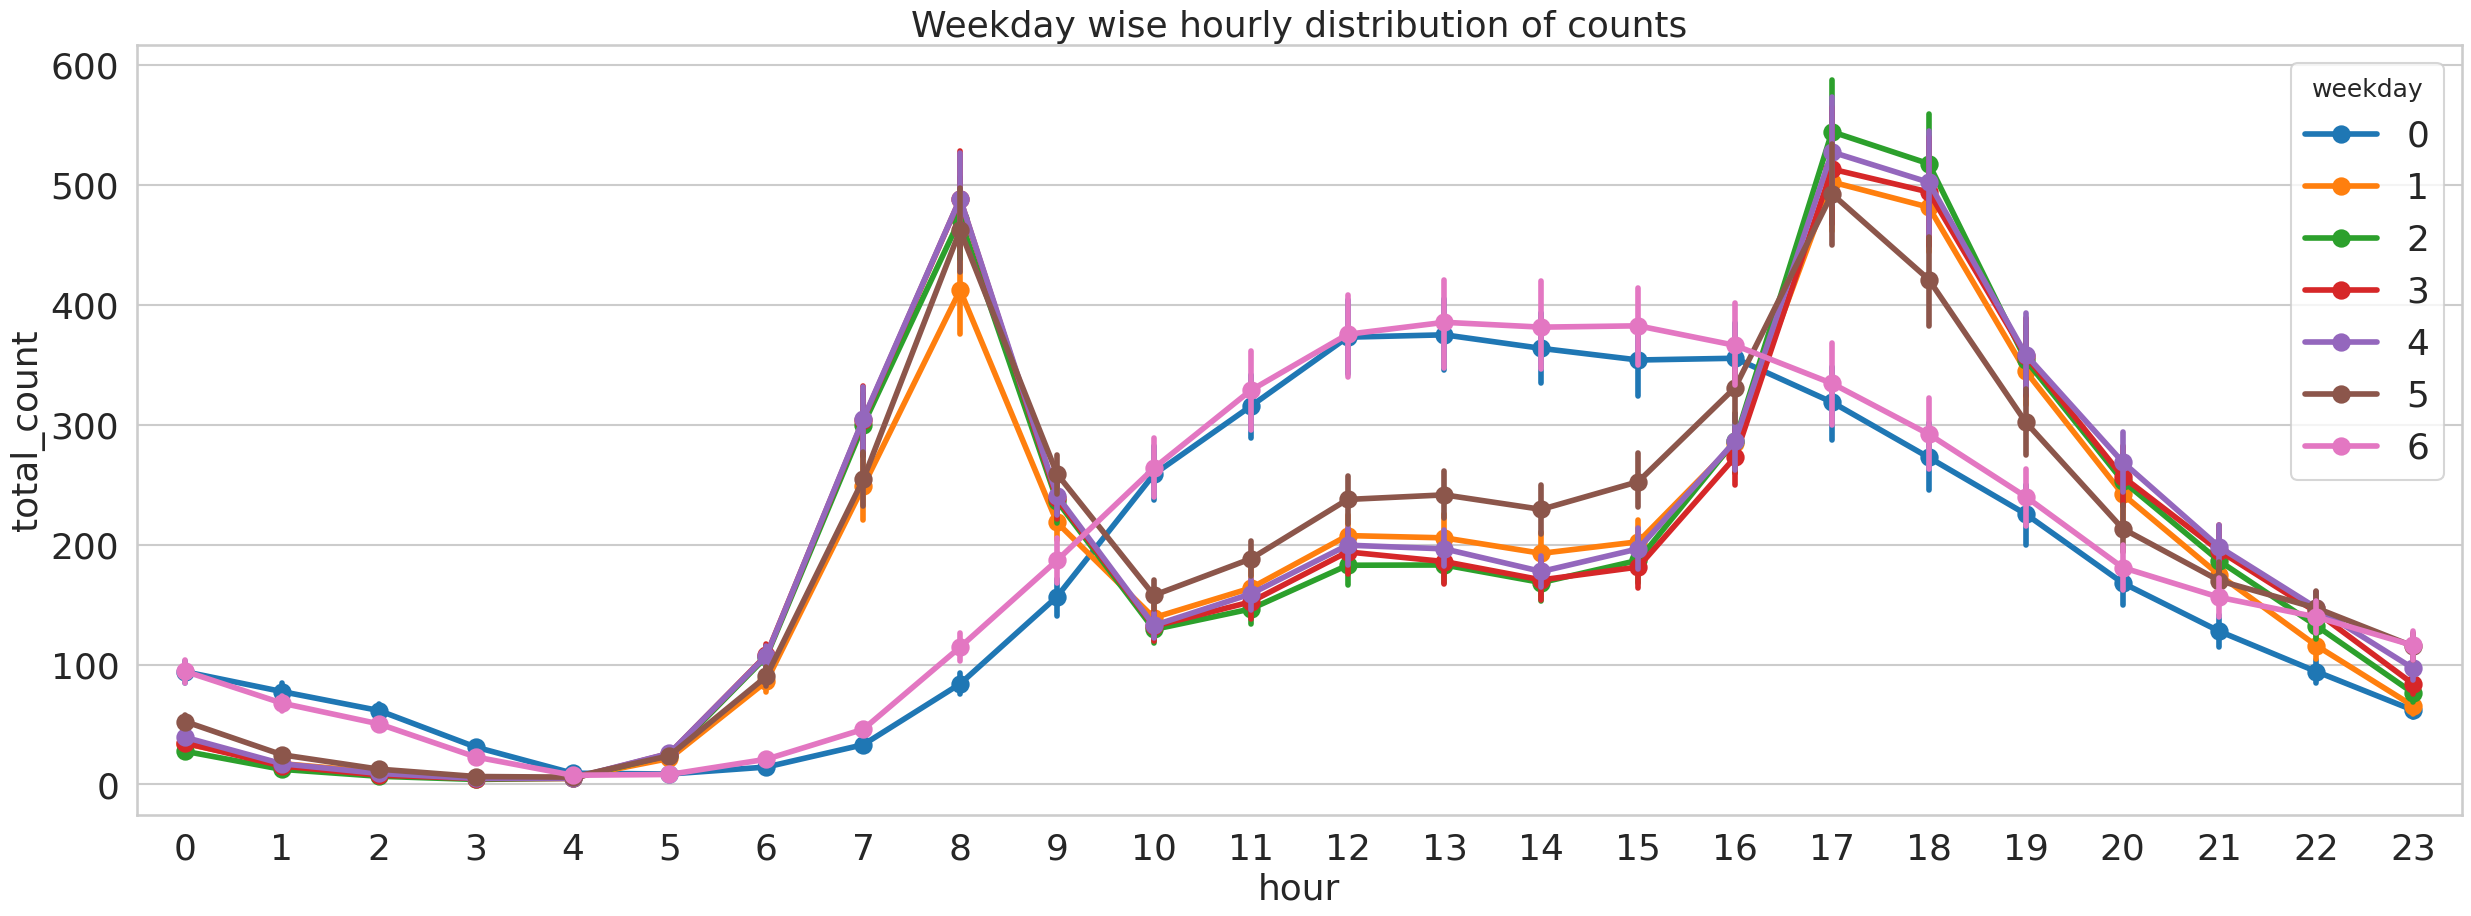

In [155]:
fig,ax = plt.subplots()
sn.pointplot(data=hour_df[['hour','total_count','weekday']],x='hour',y='total_count',hue='weekday',ax=ax)
ax.set(title="Weekday wise hourly distribution of counts")

[Text(0.5, 1.0, 'Box Pot for hourly distribution of counts')]

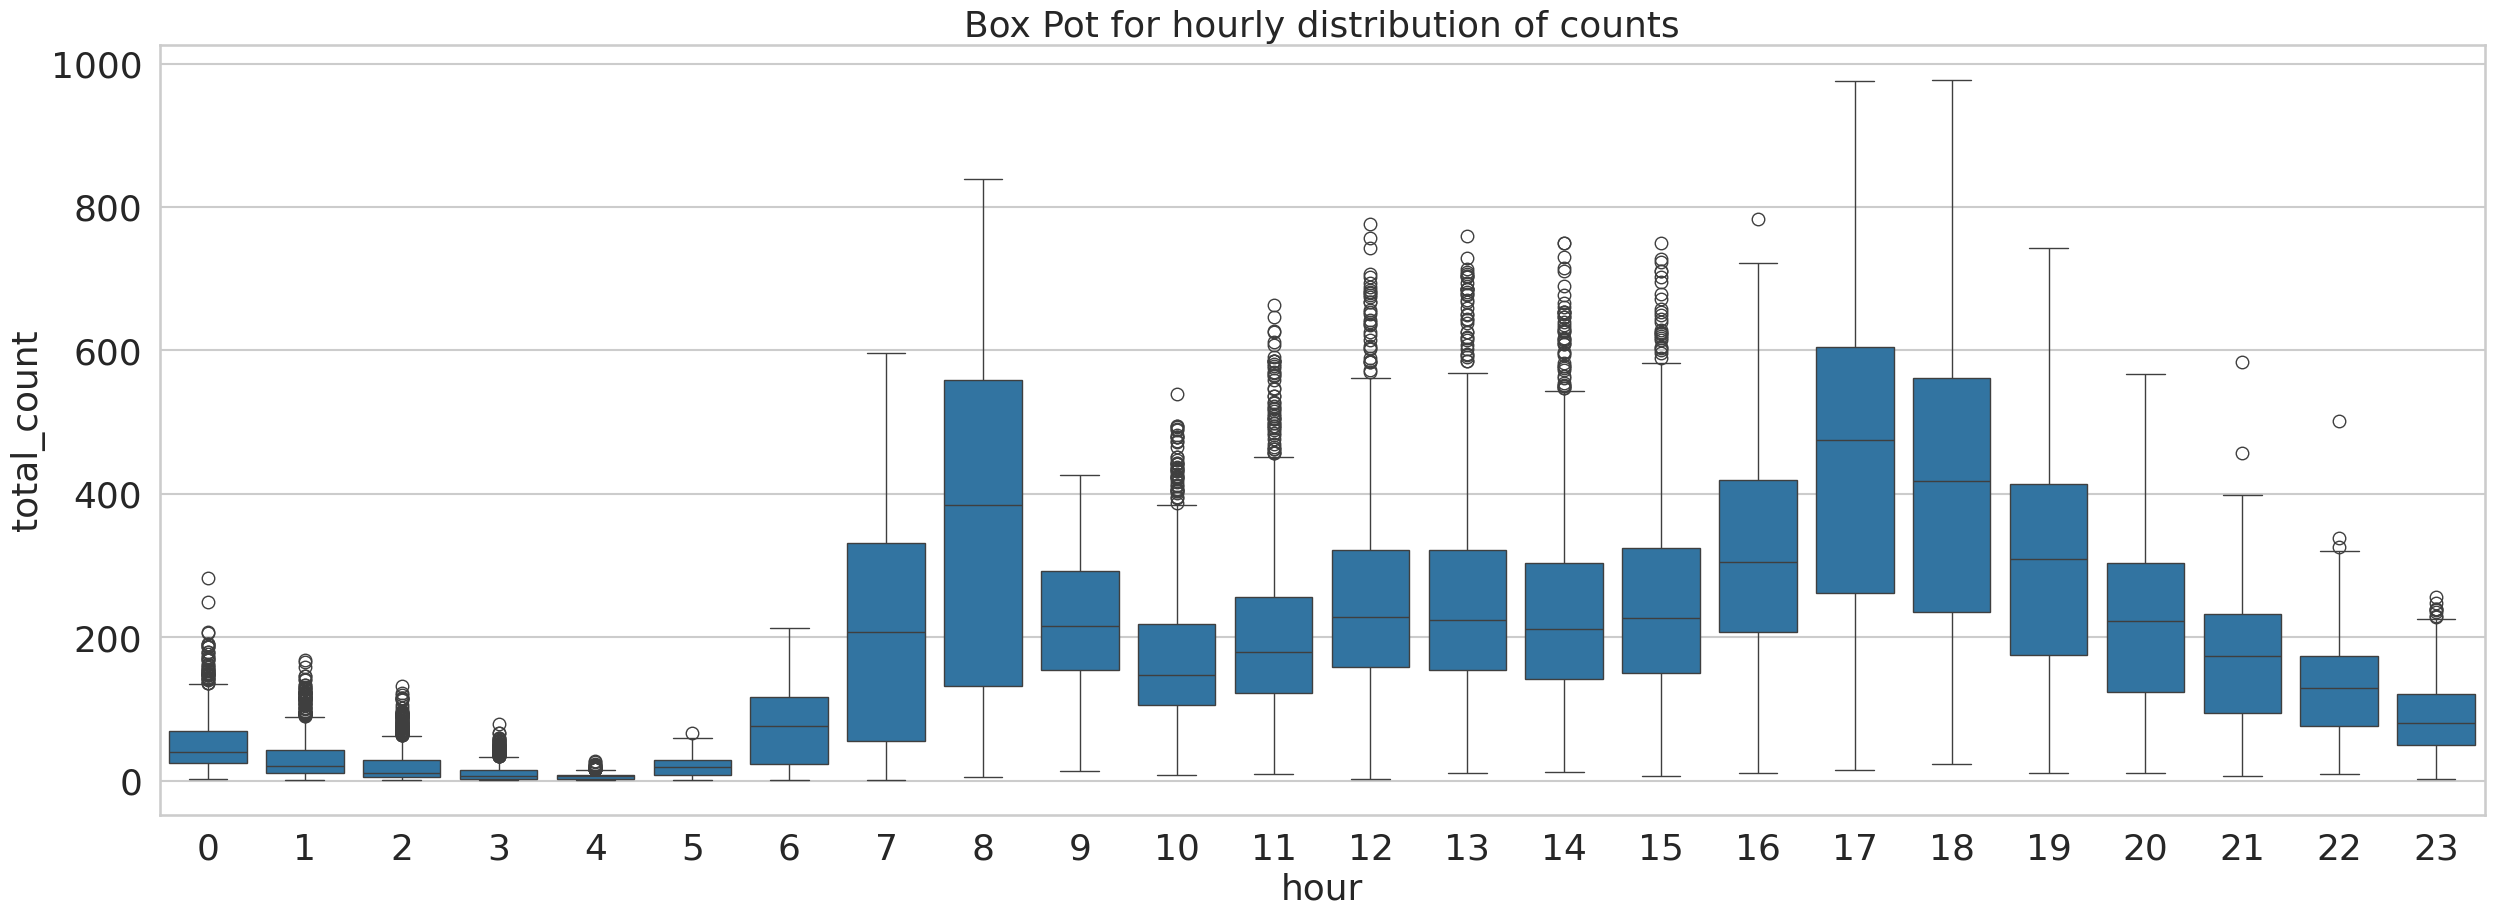

In [156]:
fig,ax = plt.subplots()
sn.boxplot(data=hour_df[['hour','total_count']],x="hour",y="total_count",ax=ax)
ax.set(title="Box Pot for hourly distribution of counts")

## **Distribusi Bulanan Jumlah Total**

[Text(0.5, 1.0, 'Monthly distribution of counts')]

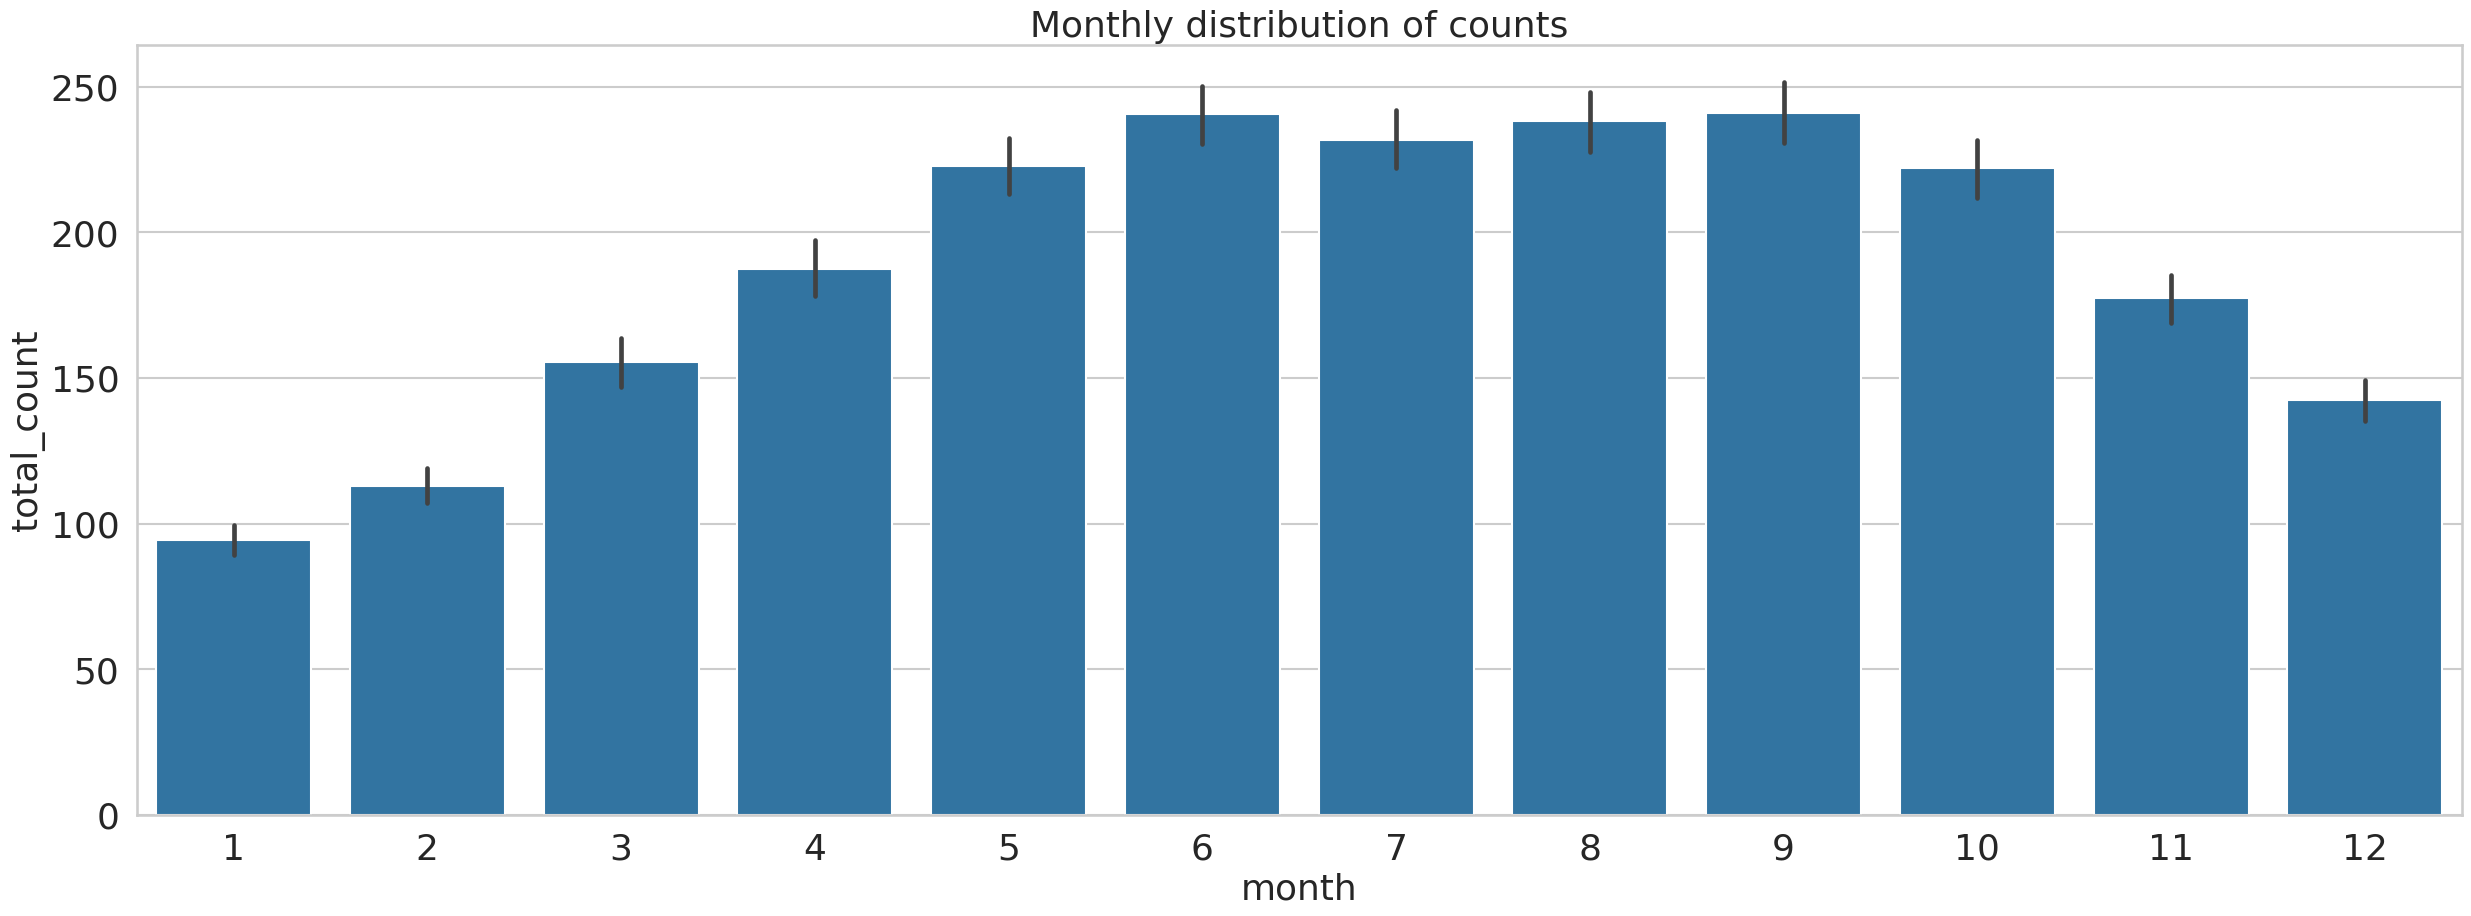

In [157]:
fig,ax = plt.subplots()
sn.barplot(data=hour_df[['month', 'total_count']], x="month",y="total_count")
ax.set(title="Monthly distribution of counts")

[Text(0.5, 1.0, 'Winter')]

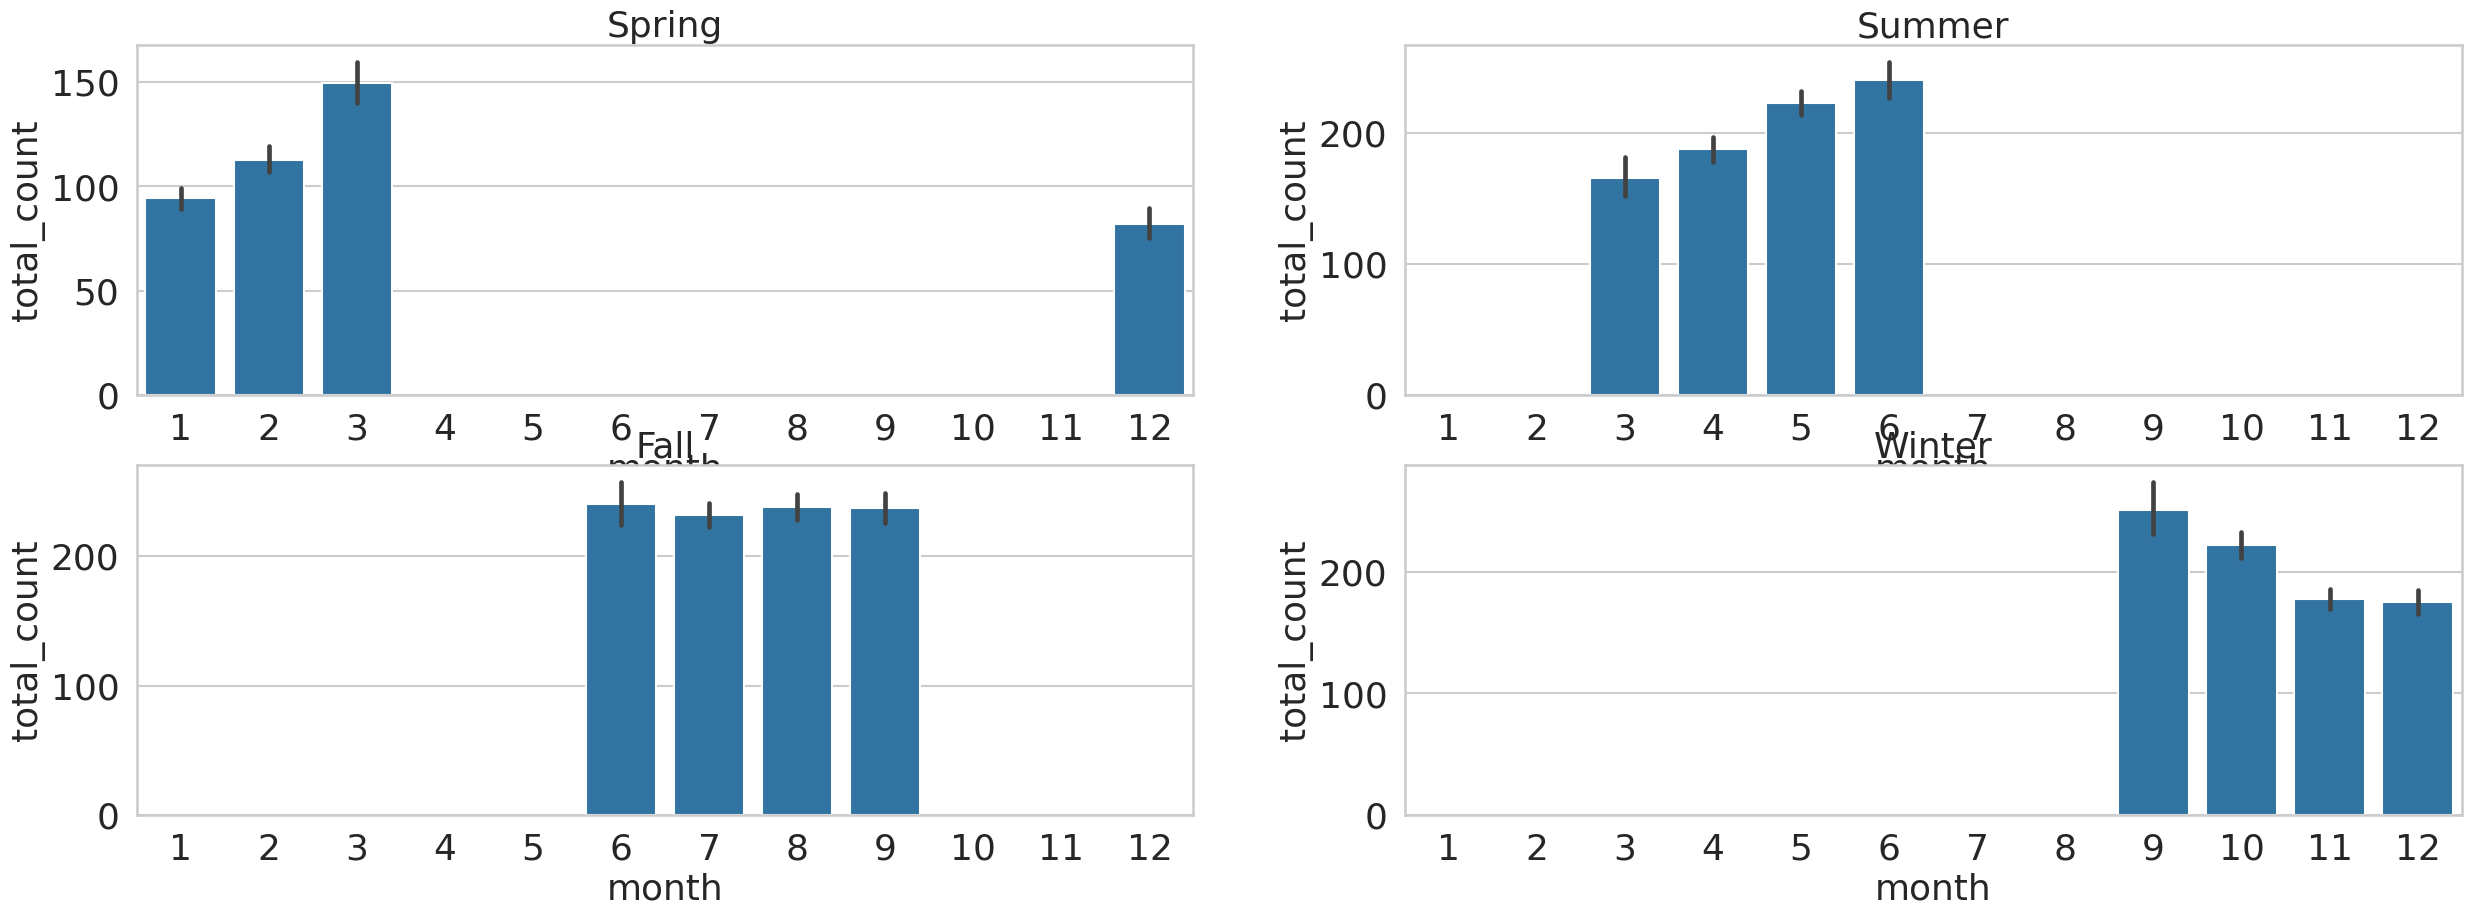

In [158]:
df_col_list = ['month','weekday','total_count']
plot_col_list= ['month','total_count']
spring_df = hour_df[hour_df.season==1][df_col_list]
summer_df = hour_df[hour_df.season==2][df_col_list]
fall_df = hour_df[hour_df.season==3][df_col_list]
winter_df = hour_df[hour_df.season==4][df_col_list]

fig,ax= plt.subplots(nrows=2,ncols=2)
sn.barplot(data=spring_df[plot_col_list],x="month",y="total_count",ax=ax[0][0],)
ax[0][0].set(title="Spring")

sn.barplot(data=summer_df[plot_col_list],x="month",y="total_count",ax=ax[0][1])
ax[0][1].set(title="Summer")

sn.barplot(data=fall_df[plot_col_list],x="month",y="total_count",ax=ax[1][0])
ax[1][0].set(title="Fall")

sn.barplot(data=winter_df[plot_col_list],x="month",y="total_count",ax=ax[1][1])
ax[1][1].set(title="Winter")

## **Distribusi Hitung Berdasarkan Tahun**

<Axes: xlabel='year', ylabel='total_count'>

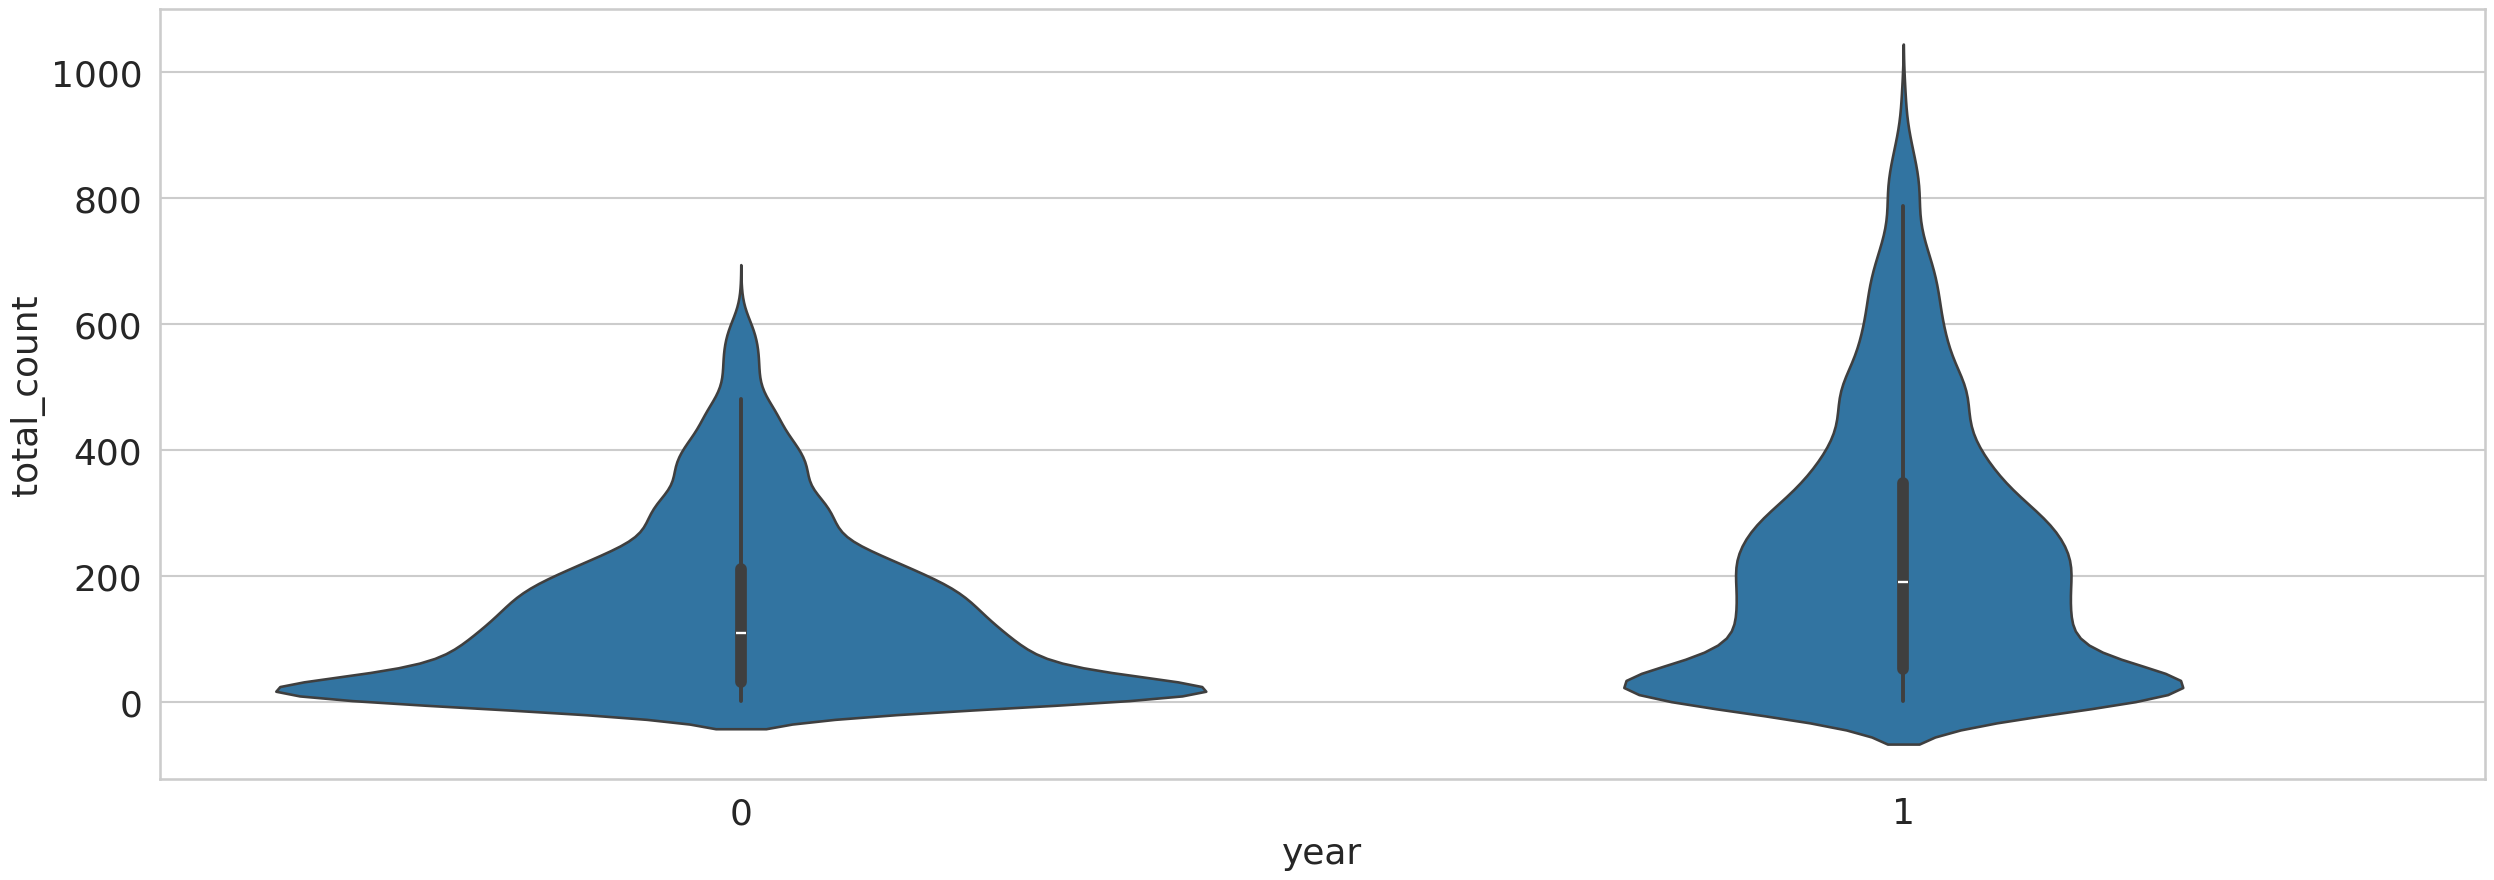

In [159]:
sn.violinplot(data=hour_df[['year', 'total_count']], x="year",y="total_count")

## **Distribusi Hari Kerja Vs Hari Libur**

<Axes: xlabel='is_workingday', ylabel='total_count'>

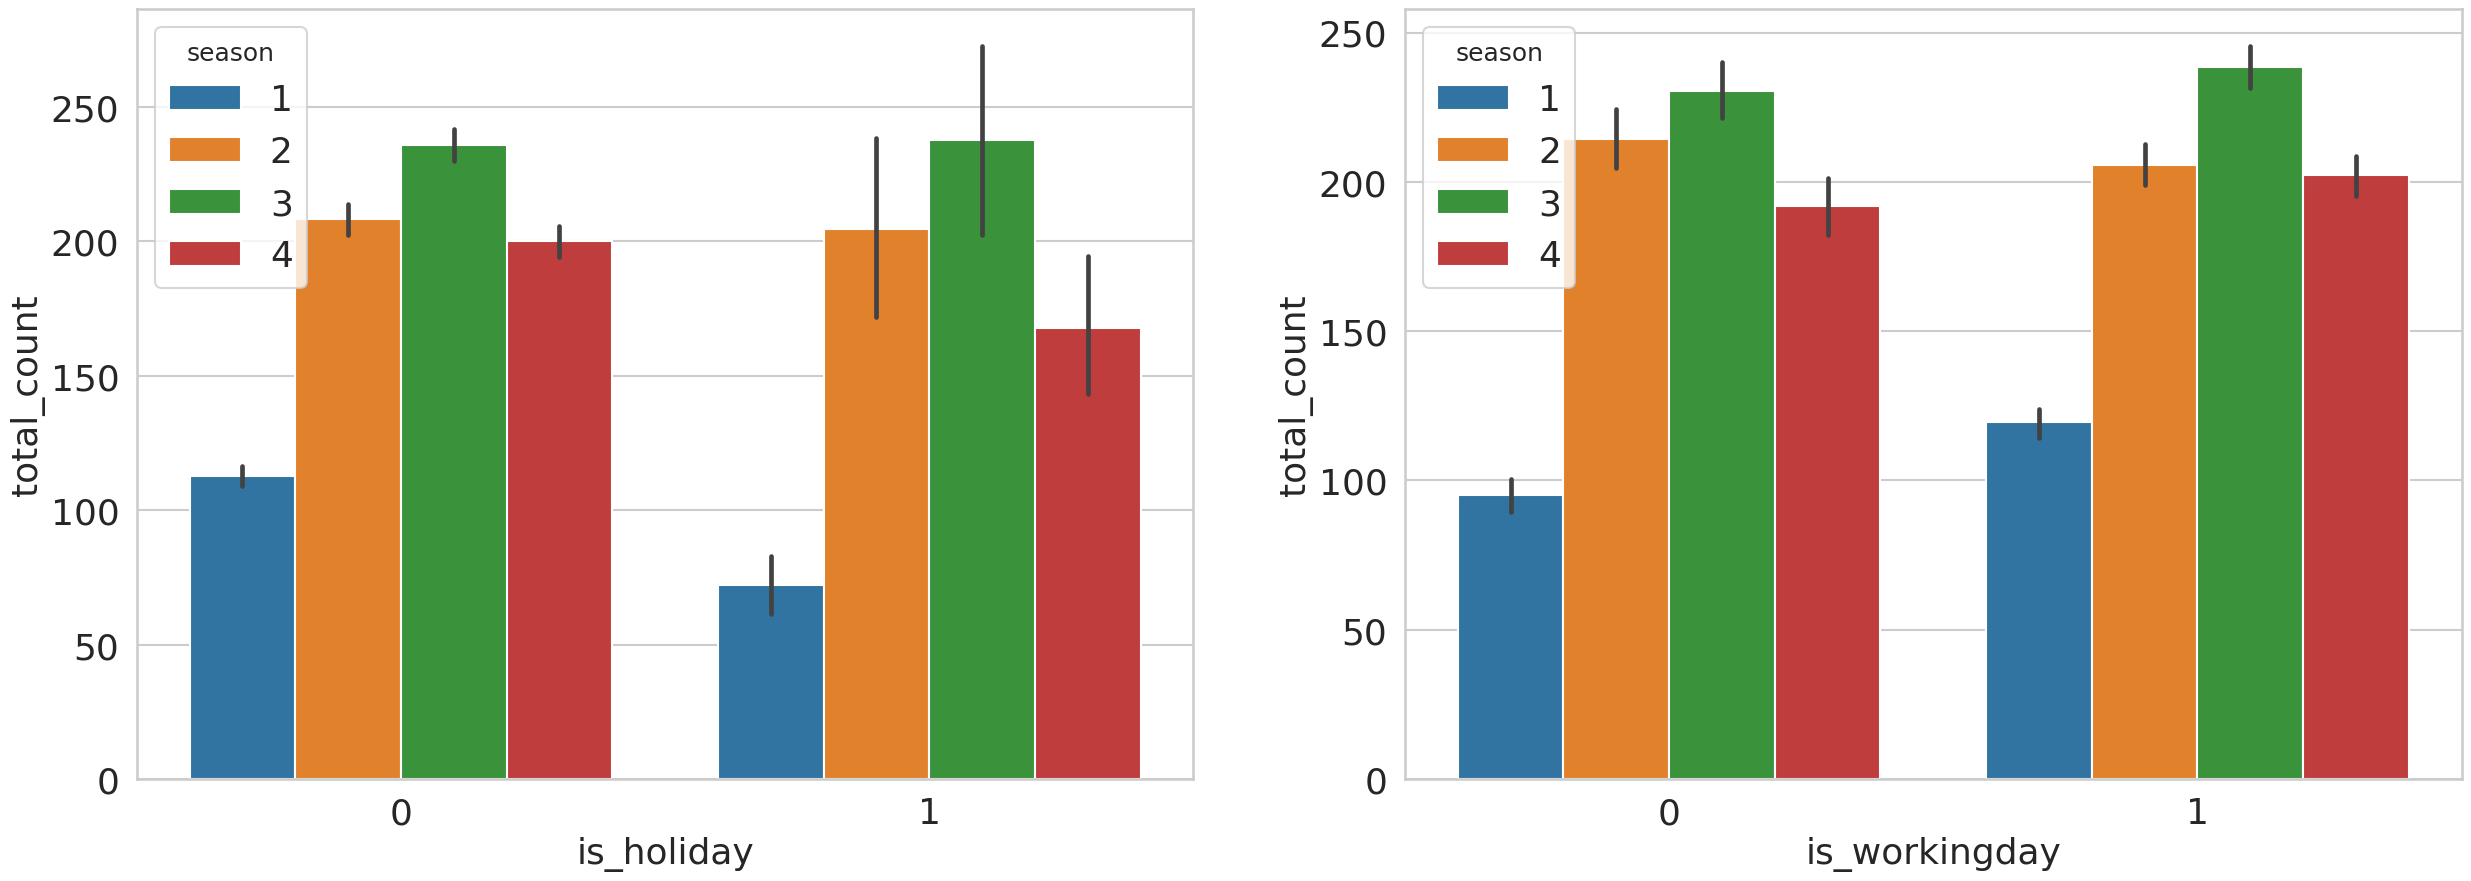

In [160]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
sn.barplot(data=hour_df,x='is_holiday',y='total_count',hue='season',ax=ax1)
sn.barplot(data=hour_df,x='is_workingday',y='total_count',hue='season',ax=ax2)

## **Outliers**

<Axes: >

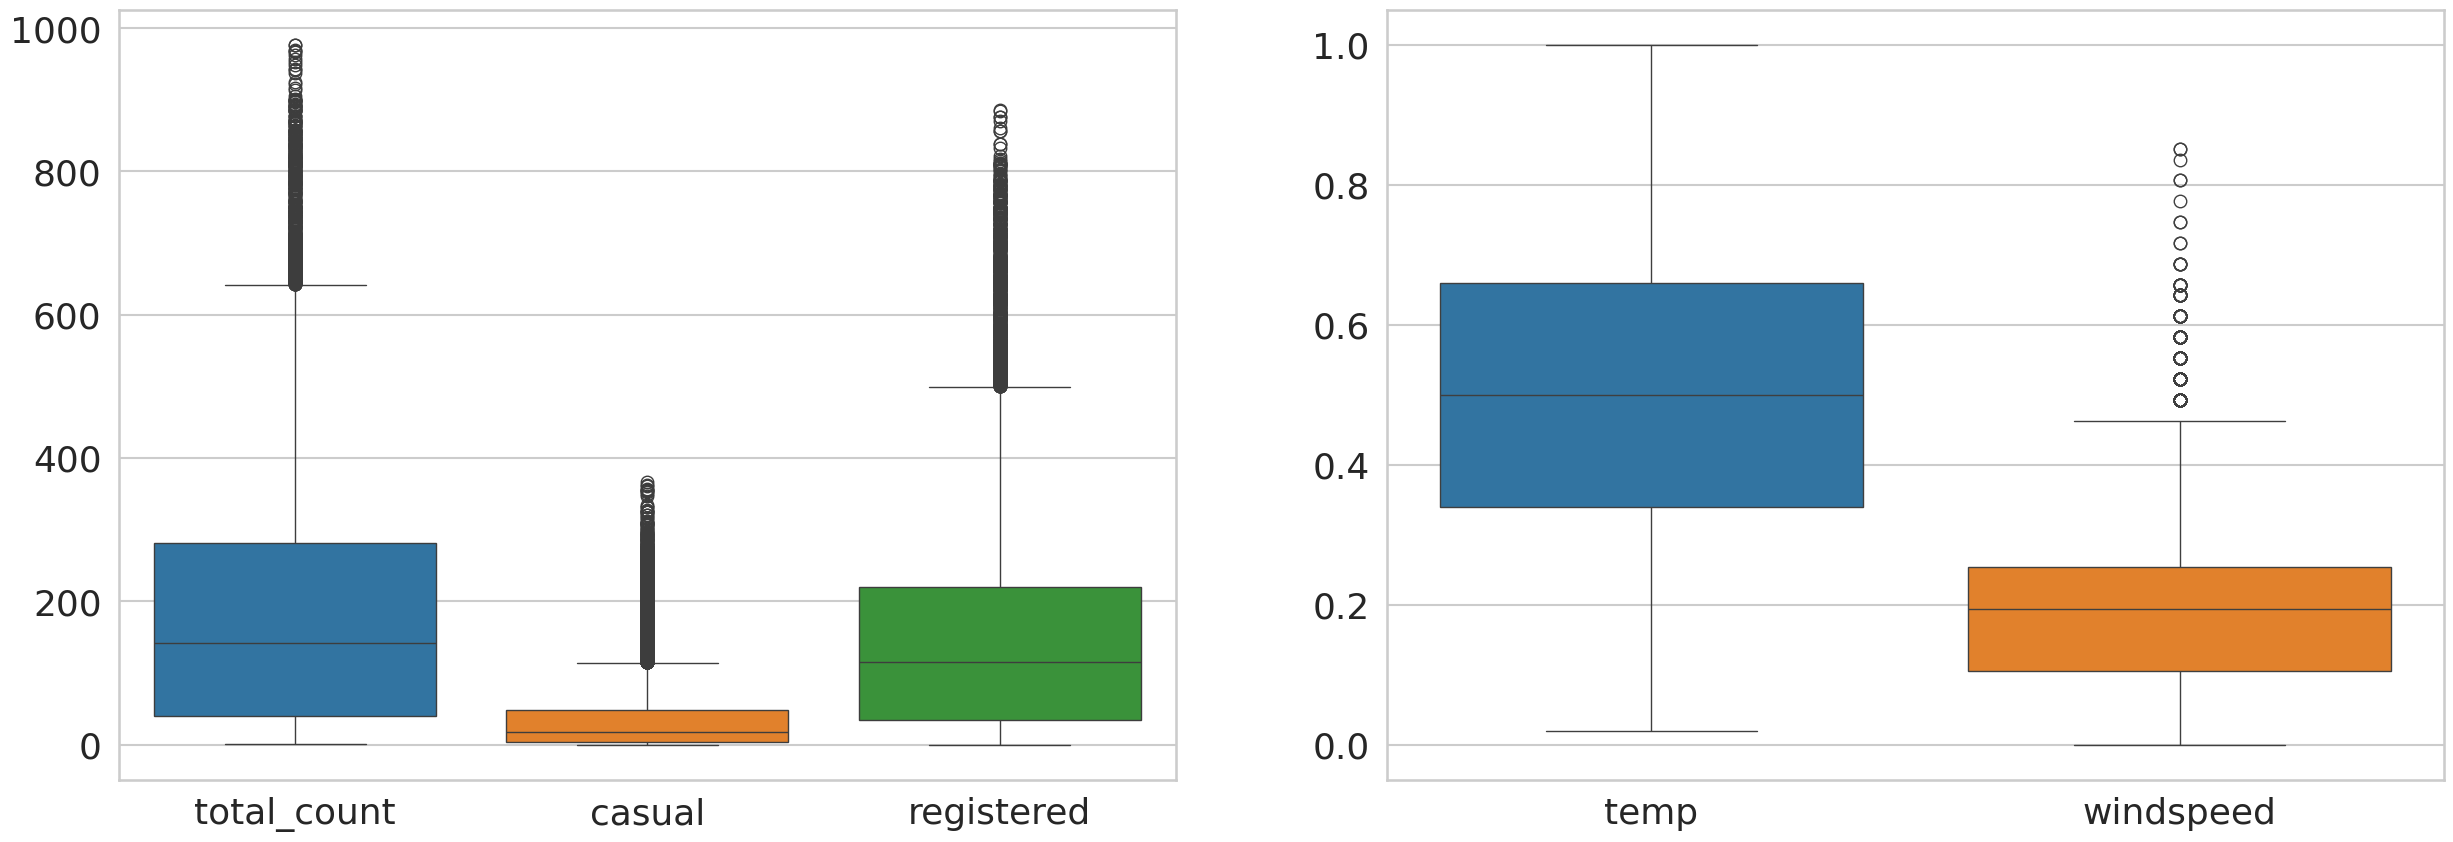

In [161]:
fig,(ax1,ax2)= plt.subplots(ncols=2)
sn.boxplot(data=hour_df[['total_count', 'casual','registered']],ax=ax1)
sn.boxplot(data=hour_df[['temp','windspeed']],ax=ax2)

## **Korelasi**

<Axes: >

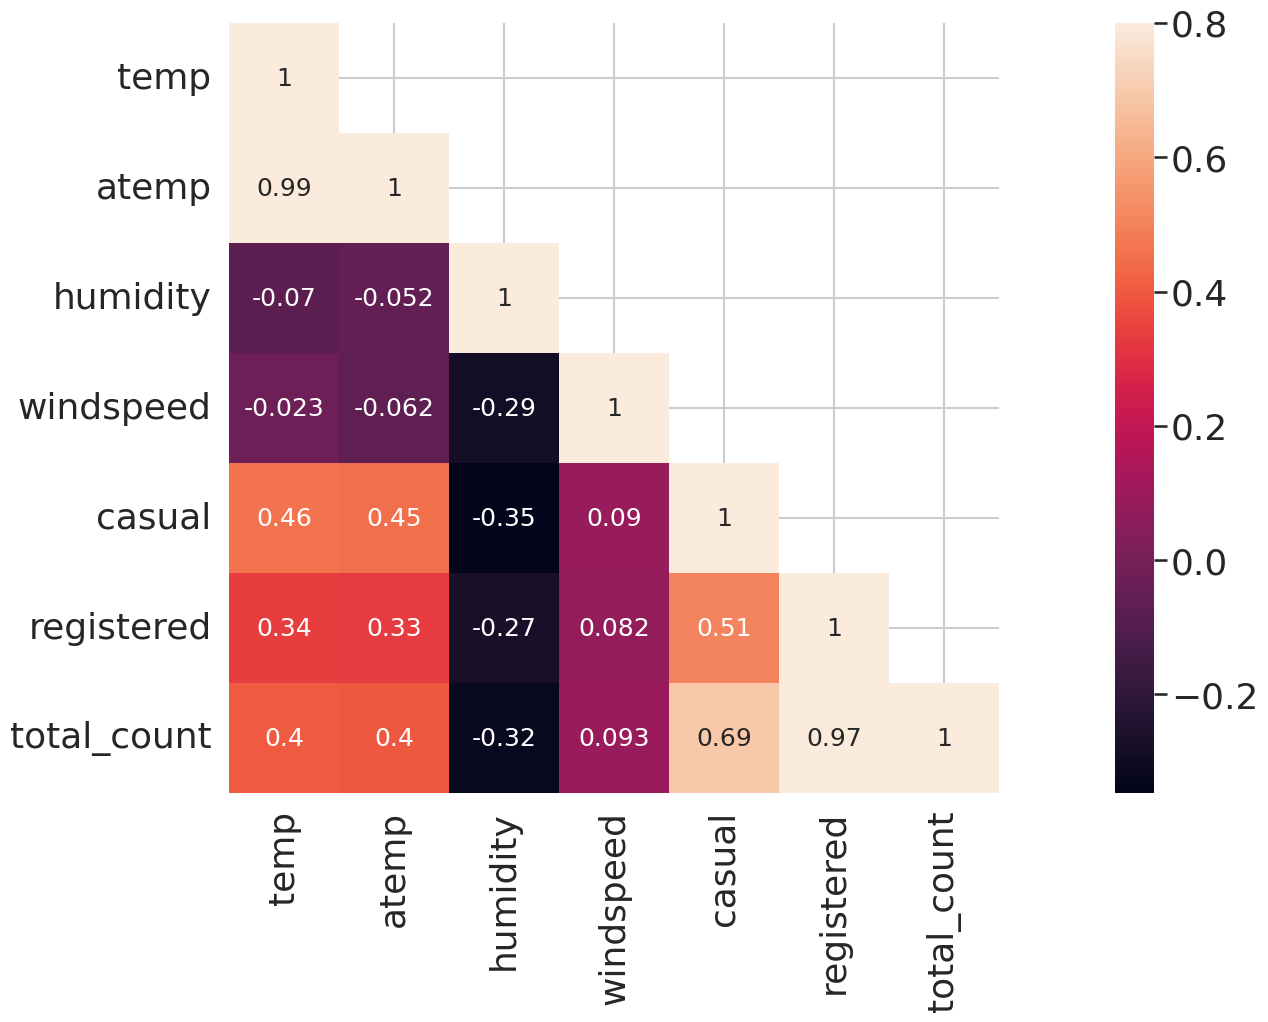

In [162]:
corrMatt = hour_df[["temp","atemp", "humidity","windspeed",
                    "casual","registered", "total_count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sn.heatmap(corrMatt, mask=mask,
           vmax=.8, square=True,annot=True)

# **Analisis Regresi**

In [163]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn import metrics
from sklearn import preprocessing
from sklearn import  linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sn
sn.set_style('whitegrid')
sn.set_context('talk')
params = {'legend.fontsize': 'x-large', 'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large', 'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large', 'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## **Standarisasi Kolom Nama**

In [164]:
hour_df.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'hr':'hour',
                        'yr':'year'},inplace=True)

## **Typecast Attributes**

In [165]:
hour_df['datetime'] = pd.to_datetime(hour_df.datetime)
hour_df['season'] = hour_df.season.astype('category')
hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['weather_condition'] = hour_df.weather_condition.astype('category')
hour_df['is_workingday'] = hour_df.is_workingday.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')

## **Enkode Kategoris (Pengodean Satu Panas)**

In [166]:
def fit_transform_ohe(df,col_name):
    """This function performs one hot encoding for the specified
        column.
    Args:
        df(pandas.DataFrame): the data frame containing the mentioned column name
        col_name: the column to be one hot encoded

    Returns:
        tuple: label_encoder, one_hot_encoder, transformed column as pandas Series
    """

    le = preprocessing.LabelEncoder()
    le_labels = le.fit_transform(df[col_name])
    df[col_name+'_label'] = le_labels

    ohe = preprocessing.OneHotEncoder()
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    return le,ohe,features_df

def transform_ohe(df,le,ohe,col_name):
    """This function performs one hot encoding for the specified
        column using the specified encoder objects.
    Args:
        df(pandas.DataFrame): the data frame containing the mentioned column name
        le(Label Encoder): the label encoder object used to fit label encoding
        ohe(One Hot Encoder): the onen hot encoder object used to fit one hot encoding
        col_name: the column to be one hot encoded
    Returns:
        tuple: transformed column as pandas Series
    """

    col_labels = le.transform(df[col_name])
    df[col_name+'_label'] = col_labels

    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    return features_df

## **Pemisahan Uji Train**

In [167]:
X, X_test, y, y_test = train_test_split(hour_df.iloc[:,0:-3], hour_df.iloc[:,-1],
                                                    test_size=0.33, random_state=42)
X.reset_index(inplace=True)
y = y.reset_index()
X_test.reset_index(inplace=True)
y_test = y_test.reset_index()
print("Training set::{}{}".format(X.shape,y.shape))
print("Testing set::{}".format(X_test.shape))

Training set::(11643, 15)(11643, 2)
Testing set::(5736, 15)


## **Uji Normalitas**

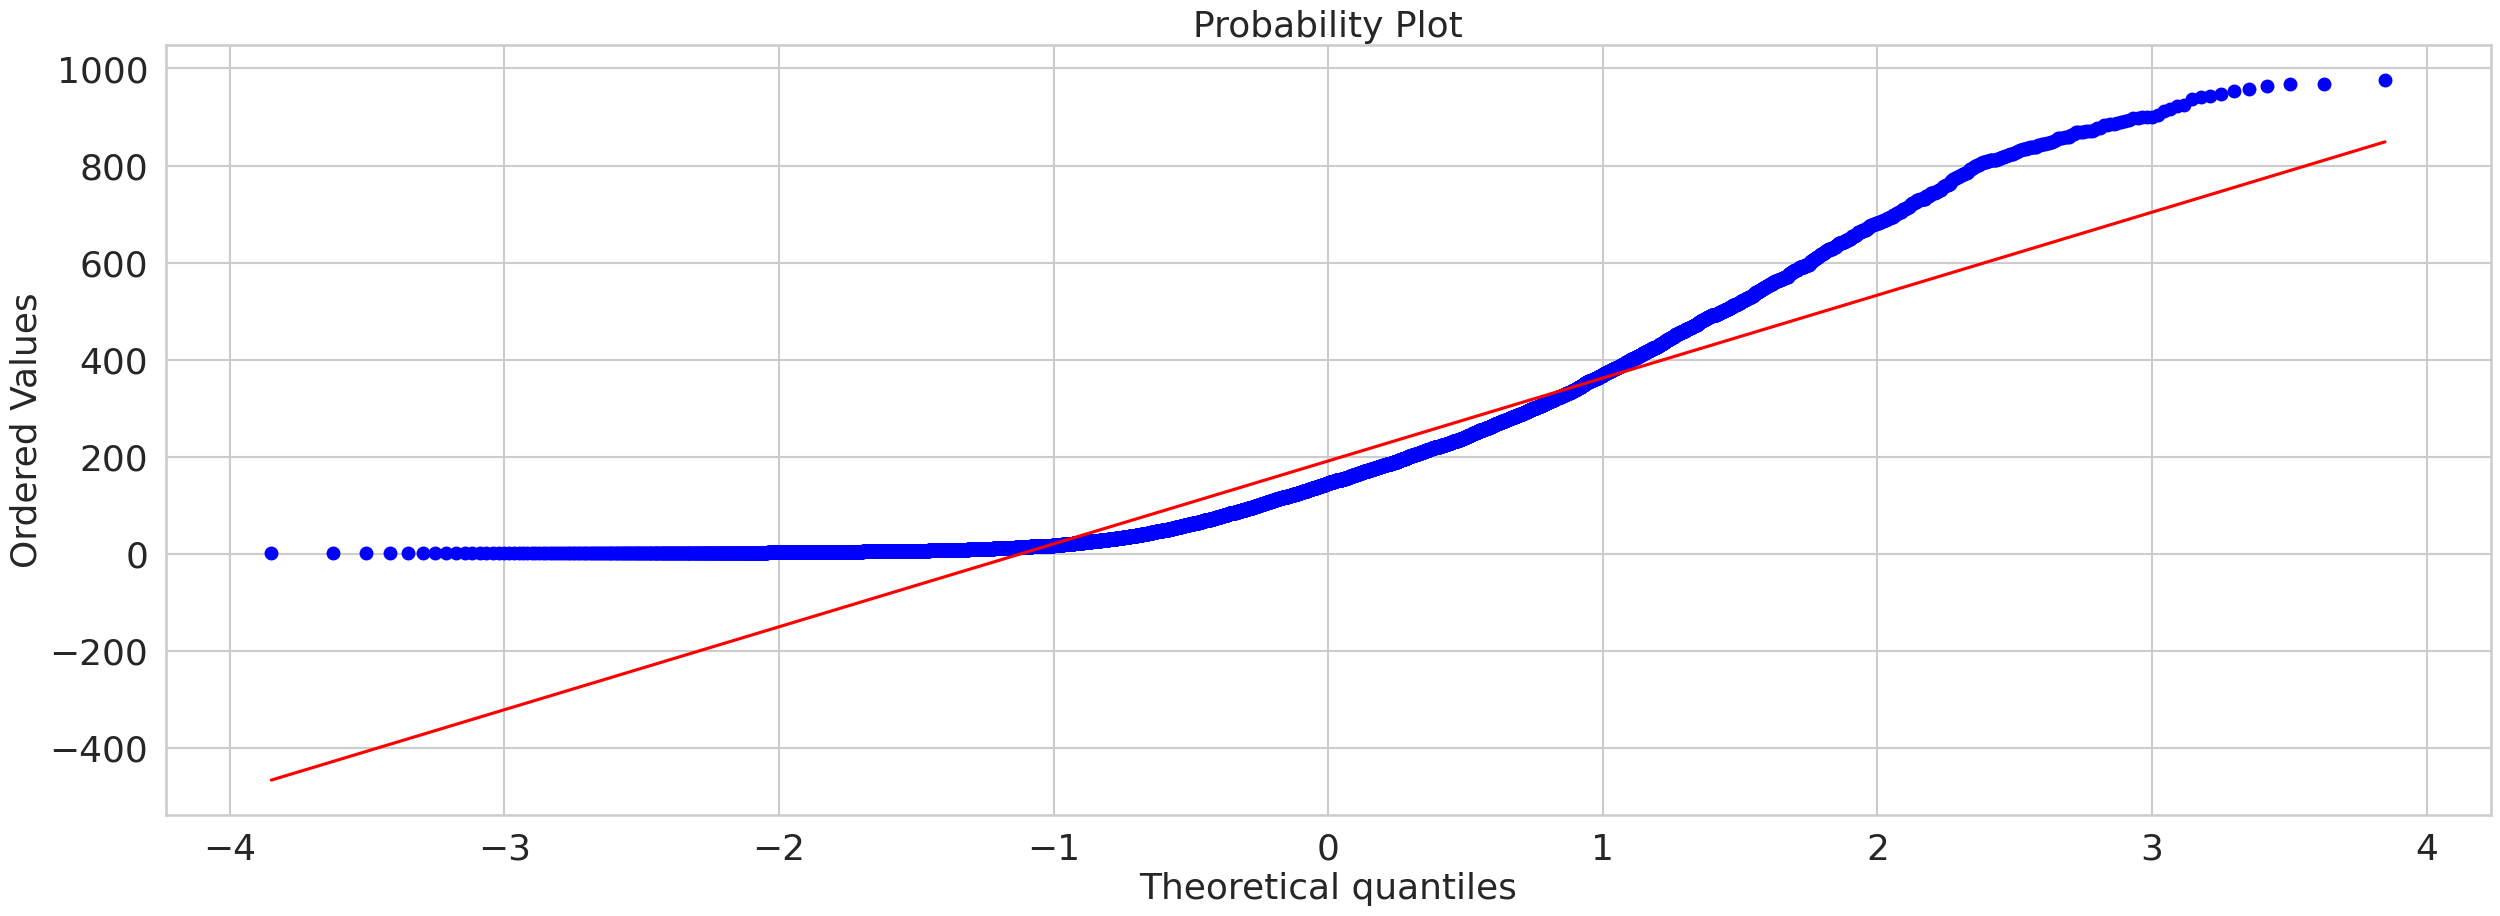

In [168]:
stats.probplot(y.total_count.tolist(), dist="norm", plot=plt)
plt.show()

In [169]:
cat_attr_list = ['season','is_holiday',
                 'weather_condition','is_workingday',
                 'hour','weekday','month','year']
numeric_feature_cols = ['temp','humidity','windspeed','hour','weekday','month','year']
subset_cat_features =  ['season','is_holiday','weather_condition','is_workingday']

In [170]:
encoded_attr_list = []
for col in cat_attr_list:
    return_obj = fit_transform_ohe(X,col)
    encoded_attr_list.append({'label_enc':return_obj[0],
                              'ohe_enc':return_obj[1],
                              'feature_df':return_obj[2],
                              'col_name':col})

In [171]:
feature_df_list = [X[numeric_feature_cols]]
feature_df_list.extend([enc['feature_df'] \
                        for enc in encoded_attr_list \
                        if enc['col_name'] in subset_cat_features])
train_df_new = pd.concat(feature_df_list, axis=1)
print("Shape::{}".format(train_df_new.shape))

Shape::(11643, 19)


## **Regresi Linear**

In [172]:
X = train_df_new
y= y.total_count.values.reshape(-1,1)
lin_reg = linear_model.LinearRegression()

## **Validasi silang**

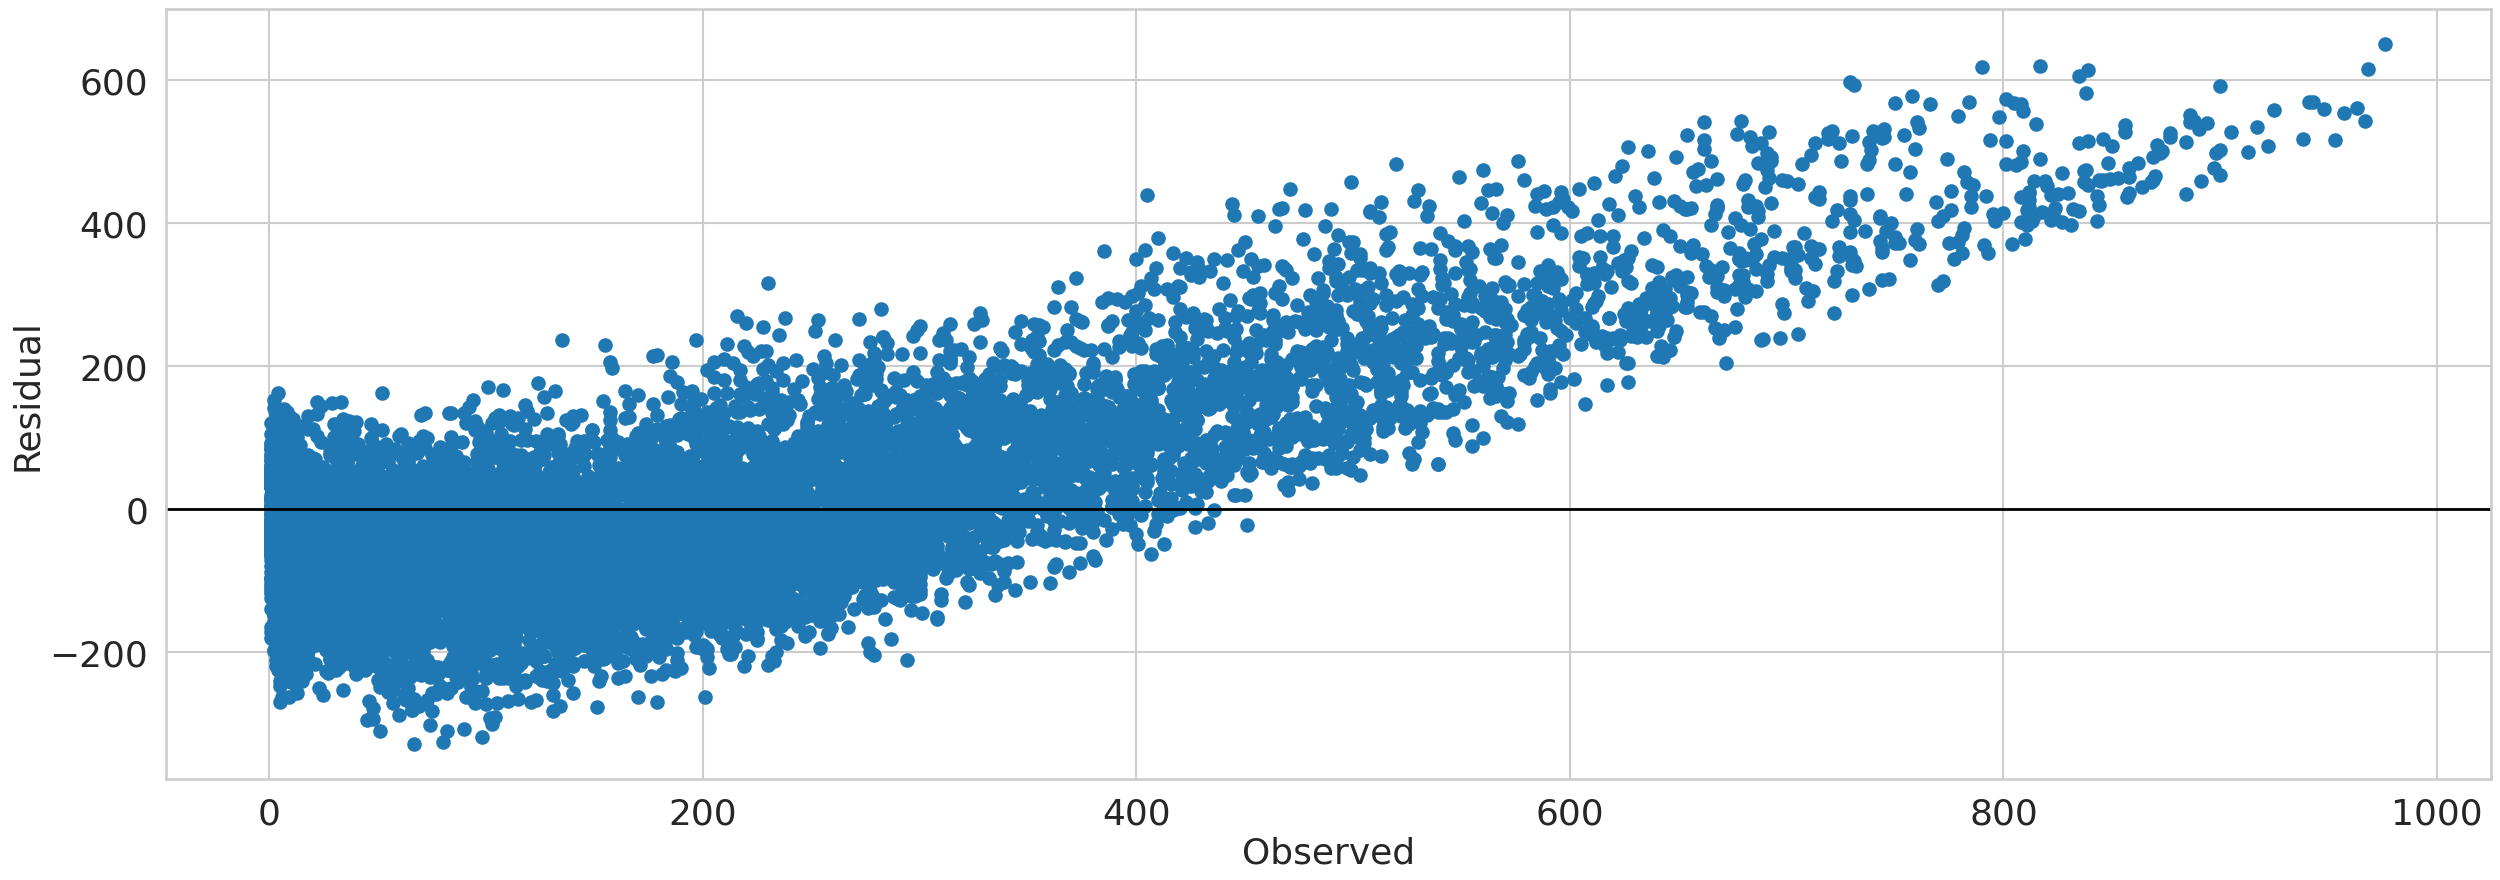

In [173]:
predicted = cross_val_predict(lin_reg, X, y, cv=10)
fig, ax = plt.subplots()
ax.scatter(y, y-predicted)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [174]:
r2_scores = cross_val_score(lin_reg, X, y, cv=10)
mse_scores = cross_val_score(lin_reg, X, y, cv=10,scoring='neg_mean_squared_error')

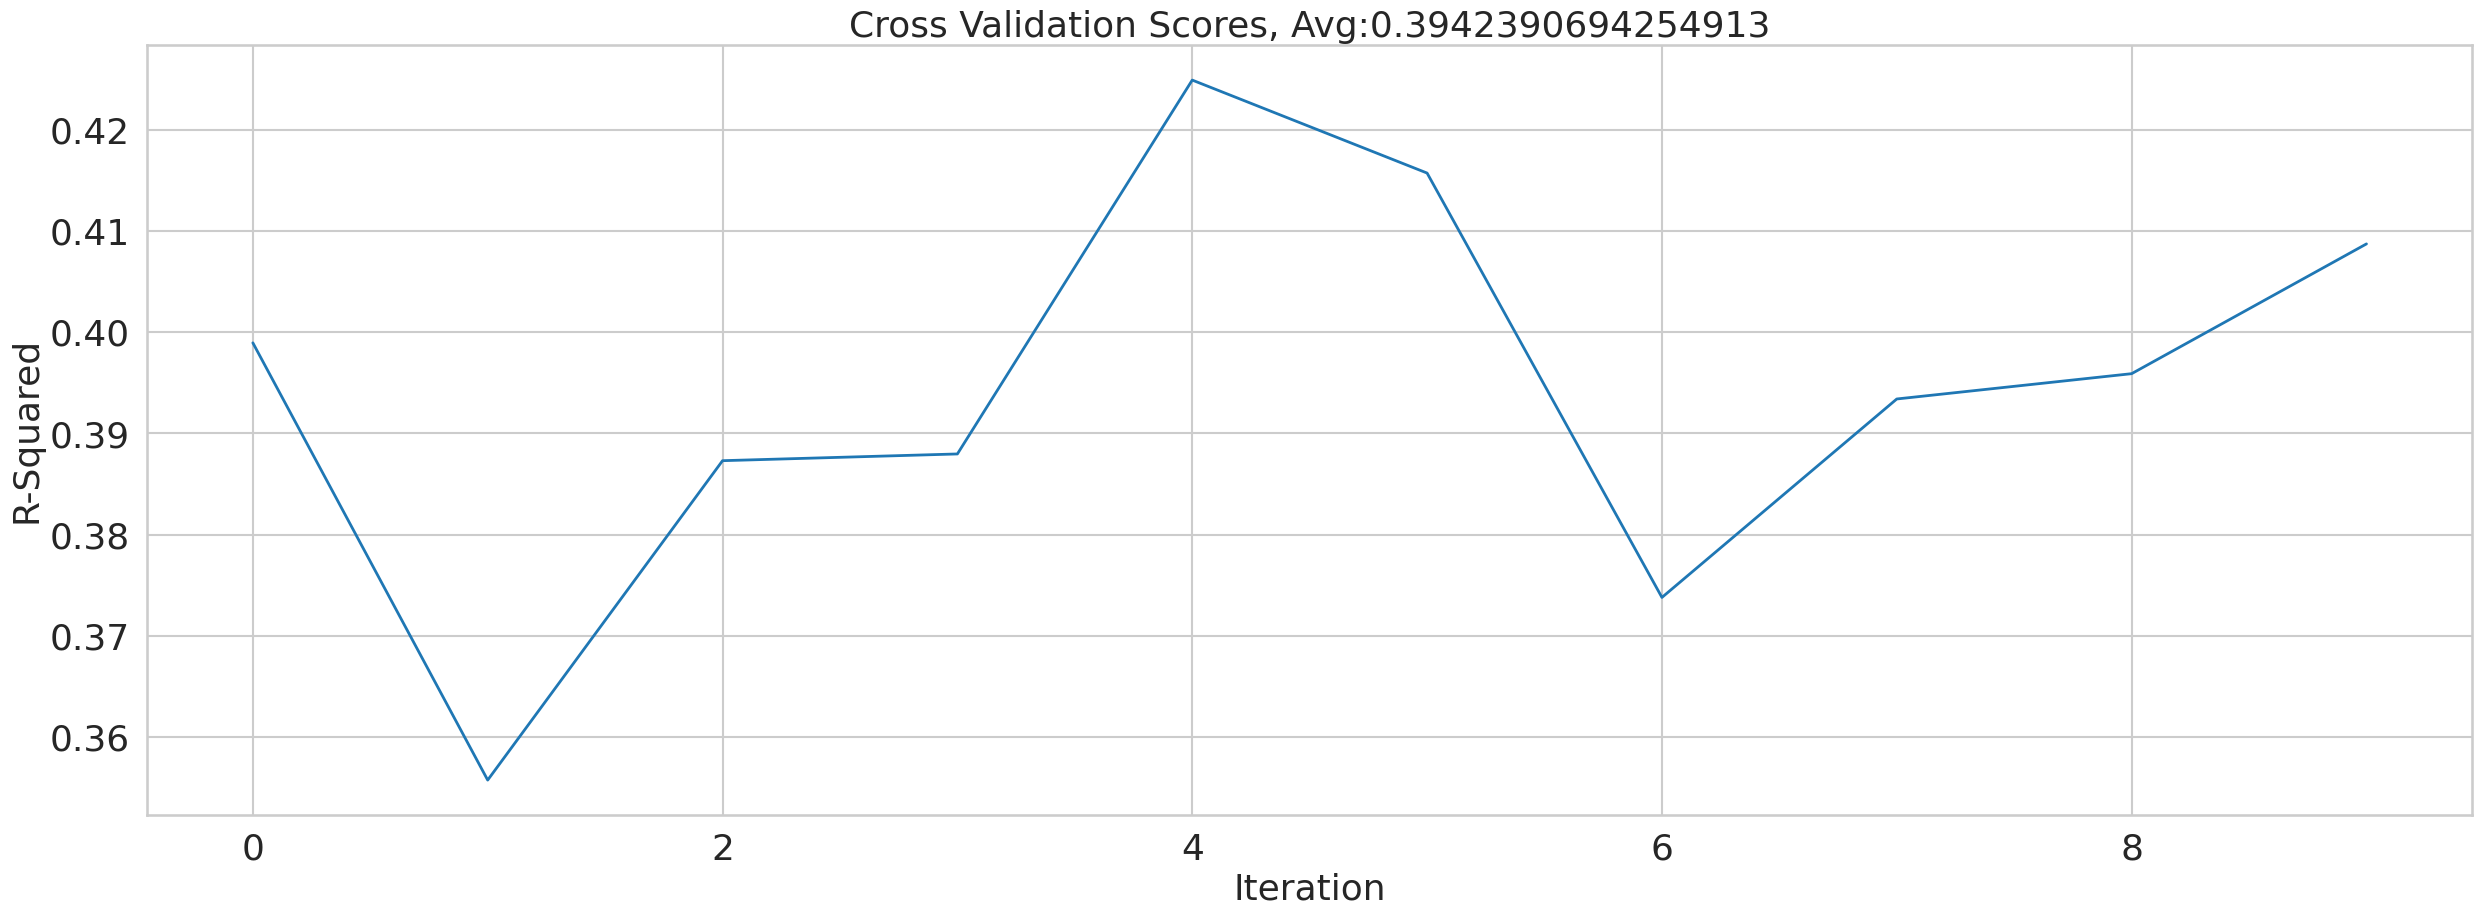

In [175]:
fig, ax = plt.subplots()
ax.plot([i for i in range(len(r2_scores))],r2_scores,lw=2)
ax.set_xlabel('Iteration')
ax.set_ylabel('R-Squared')
ax.title.set_text("Cross Validation Scores, Avg:{}".format(np.average(r2_scores)))
plt.show()

In [176]:
print("R-squared::{}".format(r2_scores))
print("MSE::{}".format(mse_scores))

R-squared::[0.39894459 0.35575732 0.3873037  0.38796861 0.42489499 0.41571164
 0.37379762 0.39339864 0.39589746 0.40871611]
MSE::[-19612.38349313 -20800.77110185 -20256.54013607 -18545.99033804
 -18746.57816436 -21015.35560028 -21549.12876053 -21567.27946203
 -21044.42416385 -18899.05989574]


In [177]:
lin_reg.fit(X,y)

LinearRegression()

## **Test Dataset Performance**

In [178]:
test_encoded_attr_list = []
for enc in encoded_attr_list:
    col_name = enc['col_name']
    le = enc['label_enc']
    ohe = enc['ohe_enc']
    test_encoded_attr_list.append({'feature_df':transform_ohe(X_test,
                                                              le,ohe,
                                                              col_name),
                                   'col_name':col_name})


test_feature_df_list = [X_test[numeric_feature_cols]]
test_feature_df_list.extend([enc['feature_df'] \
                             for enc in test_encoded_attr_list \
                             if enc['col_name'] in subset_cat_features])

test_df_new = pd.concat(test_feature_df_list, axis=1)
print("Shape::{}".format(test_df_new.shape))

Shape::(5736, 19)


In [179]:
test_df_new.head()

,temp,humidity,windspeed,hour,weekday,month,year,season_1,season_2,season_3,season_4,is_holiday_0,is_holiday_1,weather_condition_1,weather_condition_2,weather_condition_3,weather_condition_4,is_workingday_0,is_workingday_1
0,0.80,0.27,0.1940,19,6,6,1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.24,0.41,0.2239,20,1,1,1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.32,0.66,0.2836,2,5,10,0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.78,0.52,0.3582,19,2,5,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.26,0.56,0.3881,0,4,1,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [180]:
X_test = test_df_new
y_test = y_test.total_count.values.reshape(-1,1)
y_pred = lin_reg.predict(X_test)
residuals = y_test-y_pred

In [181]:
r2_score = lin_reg.score(X_test,y_test)
print("R-squared::{}".format(r2_score))
print("MSE: %.2f"
      % metrics.mean_squared_error(y_test, y_pred))

R-squared::0.4024409682673429
MSE: 19063.00


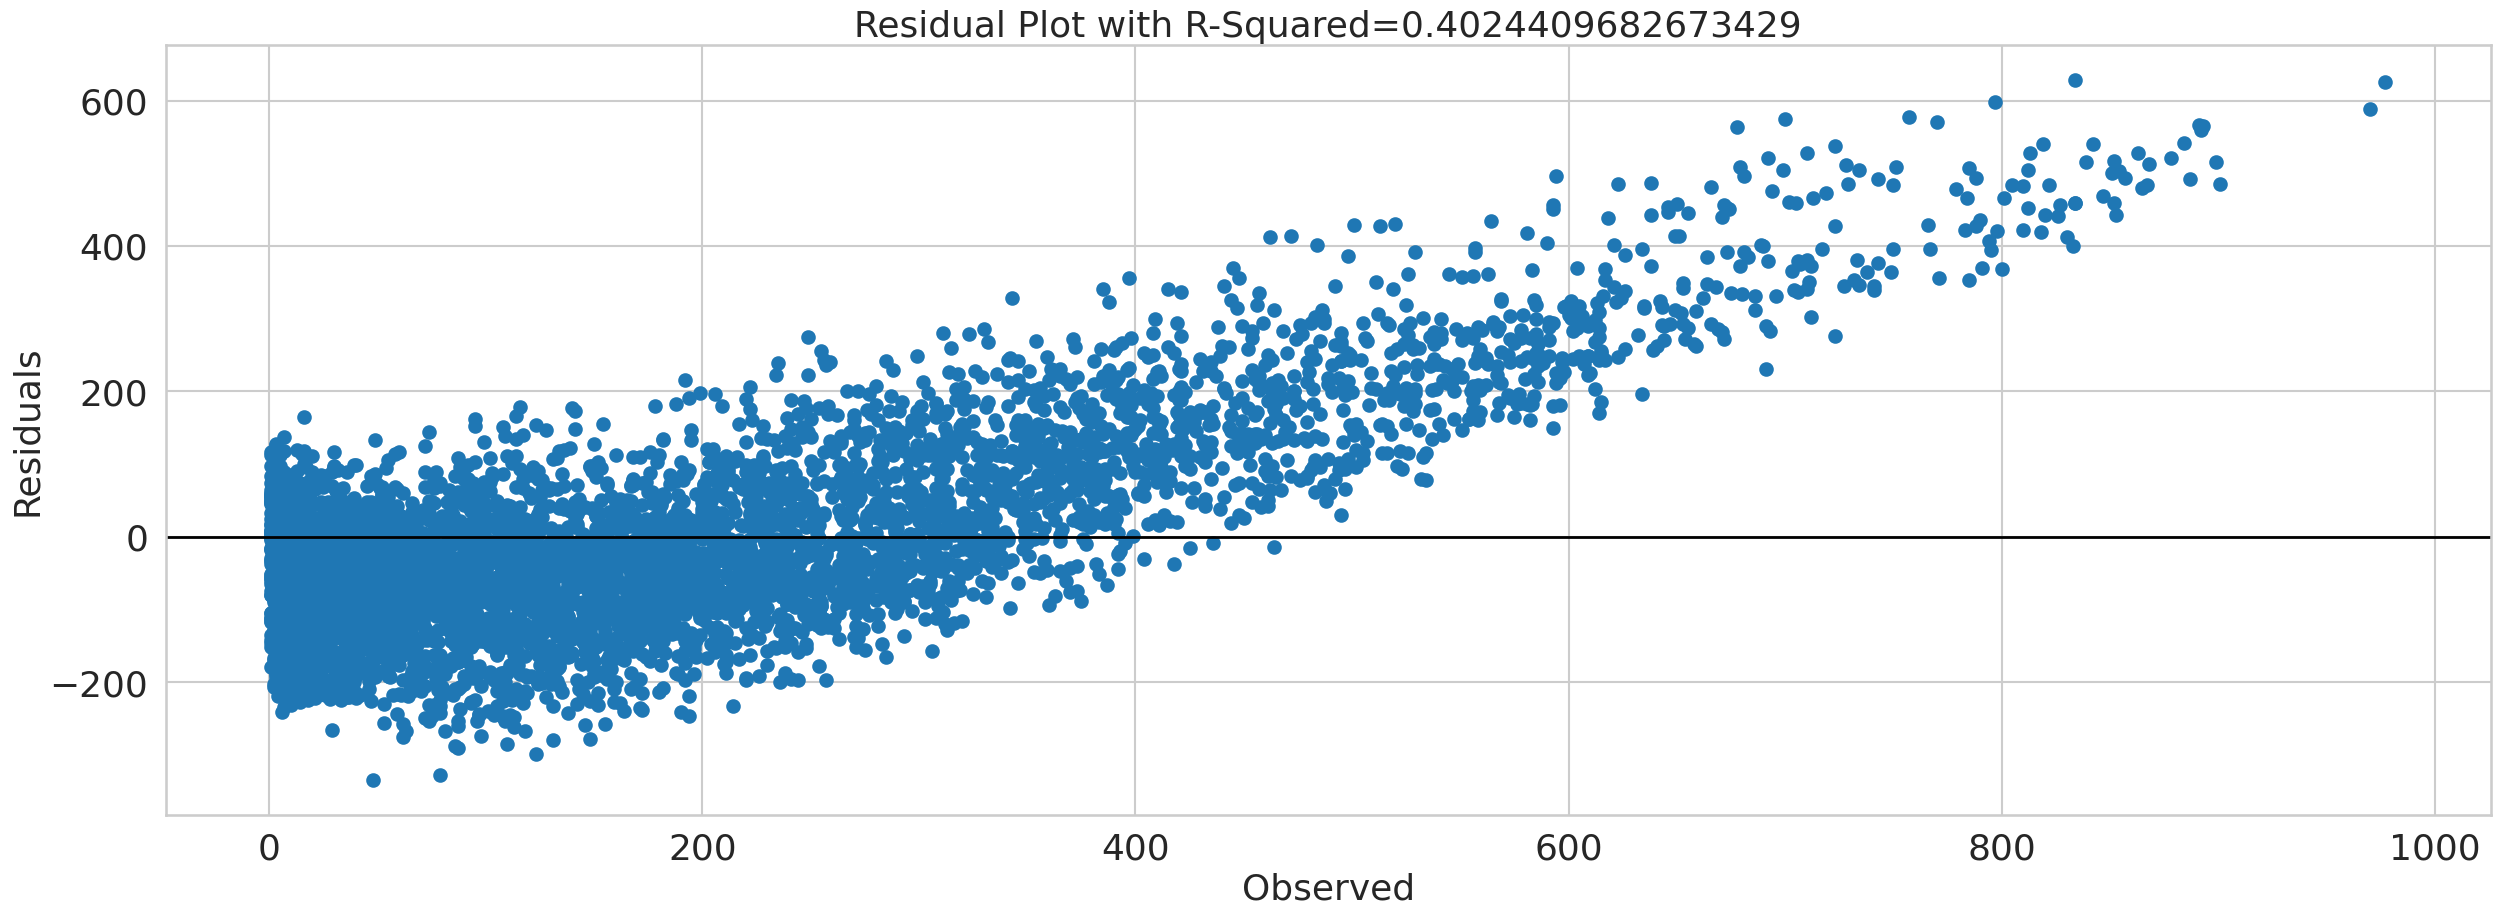

In [182]:
fig, ax = plt.subplots()
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot with R-Squared={}".format(np.average(r2_score)))
plt.show()

## **Model Statistika**

In [183]:
import statsmodels.api as sm
X = X.values.tolist()
X = sm.add_constant(X)
X_test = X_test.values.tolist()
X_test = sm.add_constant(X_test)
model = sm.OLS(y, X)
results = model.fit()
pred_y = results.predict(X_test)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     508.2
Date:                Wed, 19 Mar 2025   Prob (F-statistic):               0.00
Time:                        10:55:57   Log-Likelihood:                -74221.
No. Observations:               11643   AIC:                         1.485e+05
Df Residuals:                   11627   BIC:                         1.486e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3509     11.086     -0.122      0.9

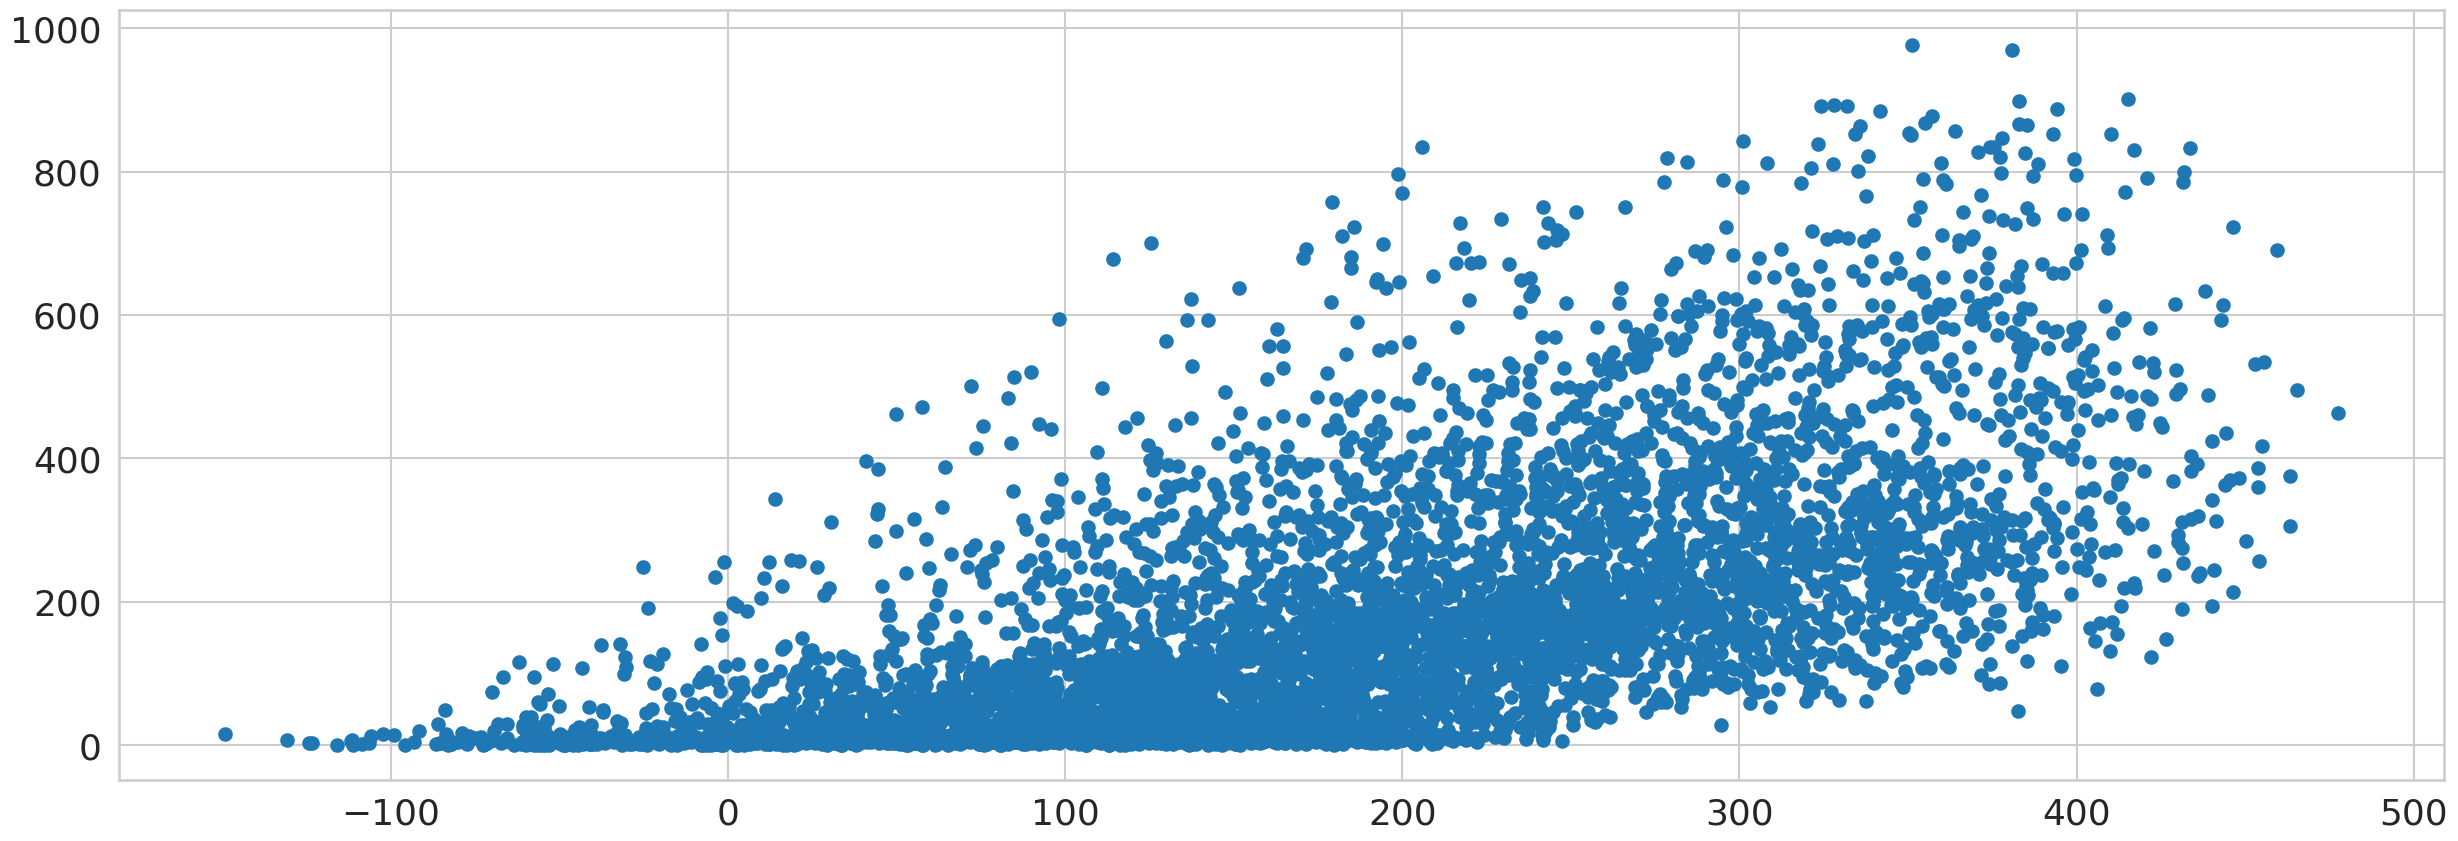

In [184]:
plt.scatter(pred_y,y_test)

# **Decision Tree Regresion**

In [185]:
%matplotlib inline
import numpy as np
import pandas as pd
import pydotplus
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sn
sn.set_style('whitegrid')
sn.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## **Standarisasi Kolom Nama**

In [186]:
hour_df.rename(columns={'instant':'rec_id', 'dteday':'datetime',
                        'holiday':'is_holiday', 'workingday':'is_workingday',
                        'weathersit':'weather_condition','hum':'humidity',
                        'mnth':'month', 'cnt':'total_count',
                        'hr':'hour', 'yr':'year'},inplace=True)

## **Typecast Attributes**

In [187]:
hour_df['datetime'] = pd.to_datetime(hour_df.datetime)
hour_df['season'] = hour_df.season.astype('category')
hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['weather_condition'] = hour_df.weather_condition.astype('category')
hour_df['is_workingday'] = hour_df.is_workingday.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')

## **Enkode Kategoris (Pengodean Satu Panas)**

In [188]:
def fit_transform_ohe(df,col_name):
    """This function performs one hot encoding for the specified
        column.

    Args:
        df(pandas.DataFrame): the data frame containing the mentioned column name
        col_name: the column to be one hot encoded

    Returns:
        tuple: label_encoder, one_hot_encoder, transformed column as pandas Series

    """
    # label encode the column
    le = preprocessing.LabelEncoder()
    le_labels = le.fit_transform(df[col_name])
    df[col_name+'_label'] = le_labels

    # one hot encoding
    ohe = preprocessing.OneHotEncoder()
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)

    return le,ohe,features_df

# given label encoder and one hot encoder objects,
# encode attribute to ohe
def transform_ohe(df,le,ohe,col_name):
    """This function performs one hot encoding for the specified
        column using the specified encoder objects.

    Args:
        df(pandas.DataFrame): the data frame containing the mentioned column name
        le(Label Encoder): the label encoder object used to fit label encoding
        ohe(One Hot Encoder): the onen hot encoder object used to fit one hot encoding
        col_name: the column to be one hot encoded

    Returns:
        tuple: transformed column as pandas Series

    """
    # label encode
    col_labels = le.transform(df[col_name])
    df[col_name+'_label'] = col_labels

    # ohe
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)

    return features_df

## **Pemisahan Uji Train**

In [189]:
X, X_test, y, y_test = train_test_split(hour_df.iloc[:,0:-3], hour_df.iloc[:,-1],
                                                    test_size=0.33, random_state=42)
X.reset_index(inplace=True)
y = y.reset_index()
X_test.reset_index(inplace=True)
y_test = y_test.reset_index()
print("Training set::{}{}".format(X.shape,y.shape))
print("Testing set::{}".format(X_test.shape))

Training set::(11643, 15)(11643, 2)
Testing set::(5736, 15)


In [190]:
cat_attr_list = ['season','is_holiday',
                 'weather_condition','is_workingday',
                 'hour','weekday','month','year']
numeric_feature_cols = ['temp','humidity','windspeed','hour','weekday','month','year']
subset_cat_features =  ['season','is_holiday','weather_condition','is_workingday']

In [191]:
encoded_attr_list = []
for col in cat_attr_list:
    return_obj = fit_transform_ohe(X,col)
    encoded_attr_list.append({'label_enc':return_obj[0],
                              'ohe_enc':return_obj[1],
                              'feature_df':return_obj[2],
                              'col_name':col})

In [192]:
feature_df_list = [X[numeric_feature_cols]]
feature_df_list.extend([enc['feature_df'] \
                        for enc in encoded_attr_list \
                        if enc['col_name'] in subset_cat_features])

train_df_new = pd.concat(feature_df_list, axis=1)
print("Shape::{}".format(train_df_new.shape))

Shape::(11643, 19)


## **Regresi Berbasis Decision Tree**

In [193]:
X = train_df_new
y= y.total_count.values.reshape(-1,1)

In [194]:
X.shape,y.shape

((11643, 19), (11643, 1))

## **Contoh Regresor Pohon Keputusan**

In [195]:
dtr = DecisionTreeRegressor(max_depth=4,
                            min_samples_split=5,
                            max_leaf_nodes=10)
dtr.fit(X,y)

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10, min_samples_split=5)

In [196]:
dtr.score(X,y)

0.5645919317952333

## **Plot Model yang Dipelajari**

In [197]:
dot_data = tree.export_graphviz(dtr, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("bikeshare.pdf")

True

## **Pencarian Grid dengan Validasi Silang**

In [198]:
param_grid = {"criterion": ["squared_error", "absolute_error"], # Change 'mse' to 'squared_error' and 'mae' to 'absolute_error'
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100, 500, 800],}

In [199]:
grid_cv_dtr = GridSearchCV(dtr, param_grid, cv=5)

In [200]:
grid_cv_dtr.fit(X,y)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10,
                                             min_samples_split=5),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100, 500, 800],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]})

## **Validasi Silang: Detail Model Terbaik**

In [201]:
print("R-Squared::{}".format(grid_cv_dtr.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtr.best_params_))

R-Squared::0.8333284746008405
Best Hyperparameters::
{'criterion': 'squared_error', 'max_depth': 8, 'max_leaf_nodes': 500, 'min_samples_leaf': 20, 'min_samples_split': 10}


In [202]:
df = pd.DataFrame(data=grid_cv_dtr.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009280,0.001011,0.002645,0.000647,squared_error,2,5,20,10,"{'criterion': 'squared_error', 'max_depth': 2, 'max_leaf_nodes': 5, 'min_samples_leaf': 20, 'min_samples_split': 10}",0.392674,0.400027,0.417498,0.399368,0.417796,0.405472,0.010268,181
1,0.007952,0.000456,0.002009,0.000239,squared_error,2,5,20,20,"{'criterion': 'squared_error', 'max_depth': 2, 'max_leaf_nodes': 5, 'min_samples_leaf': 20, 'min_samples_split': 20}",0.392674,0.400027,0.417498,0.399368,0.417796,0.405472,0.010268,181
2,0.007387,0.000059,0.001797,0.000276,squared_error,2,5,20,40,"{'criterion': 'squared_error', 'max_depth': 2, 'max_leaf_nodes': 5, 'min_samples_leaf': 20, 'min_samples_split': 40}",0.392674,0.400027,0.417498,0.399368,0.417796,0.405472,0.010268,181
3,0.007594,0.000342,0.001857,0.000255,squared_error,2,5,40,10,"{'criterion': 'squared_error', 'max_depth': 2, 'max_leaf_nodes': 5, 'min_samples_leaf': 40, 'min_samples_split': 10}",0.392674,0.400027,0.417498,0.399368,0.417796,0.405472,0.010268,181
4,0.008049,0.000462,0.001845,0.000169,squared_error,2,5,40,20,"{'criterion': 'squared_error', 'max_depth': 2, 'max_leaf_nodes': 5, 'min_samples_leaf': 40, 'min_samples_split': 20}",0.392674,0.400027,0.417498,0.399368,0.417796,0.405472,0.010268,181


[Text(0.5, 1.0, 'Effect of Depth and Leaf Nodes on Model Performance')]

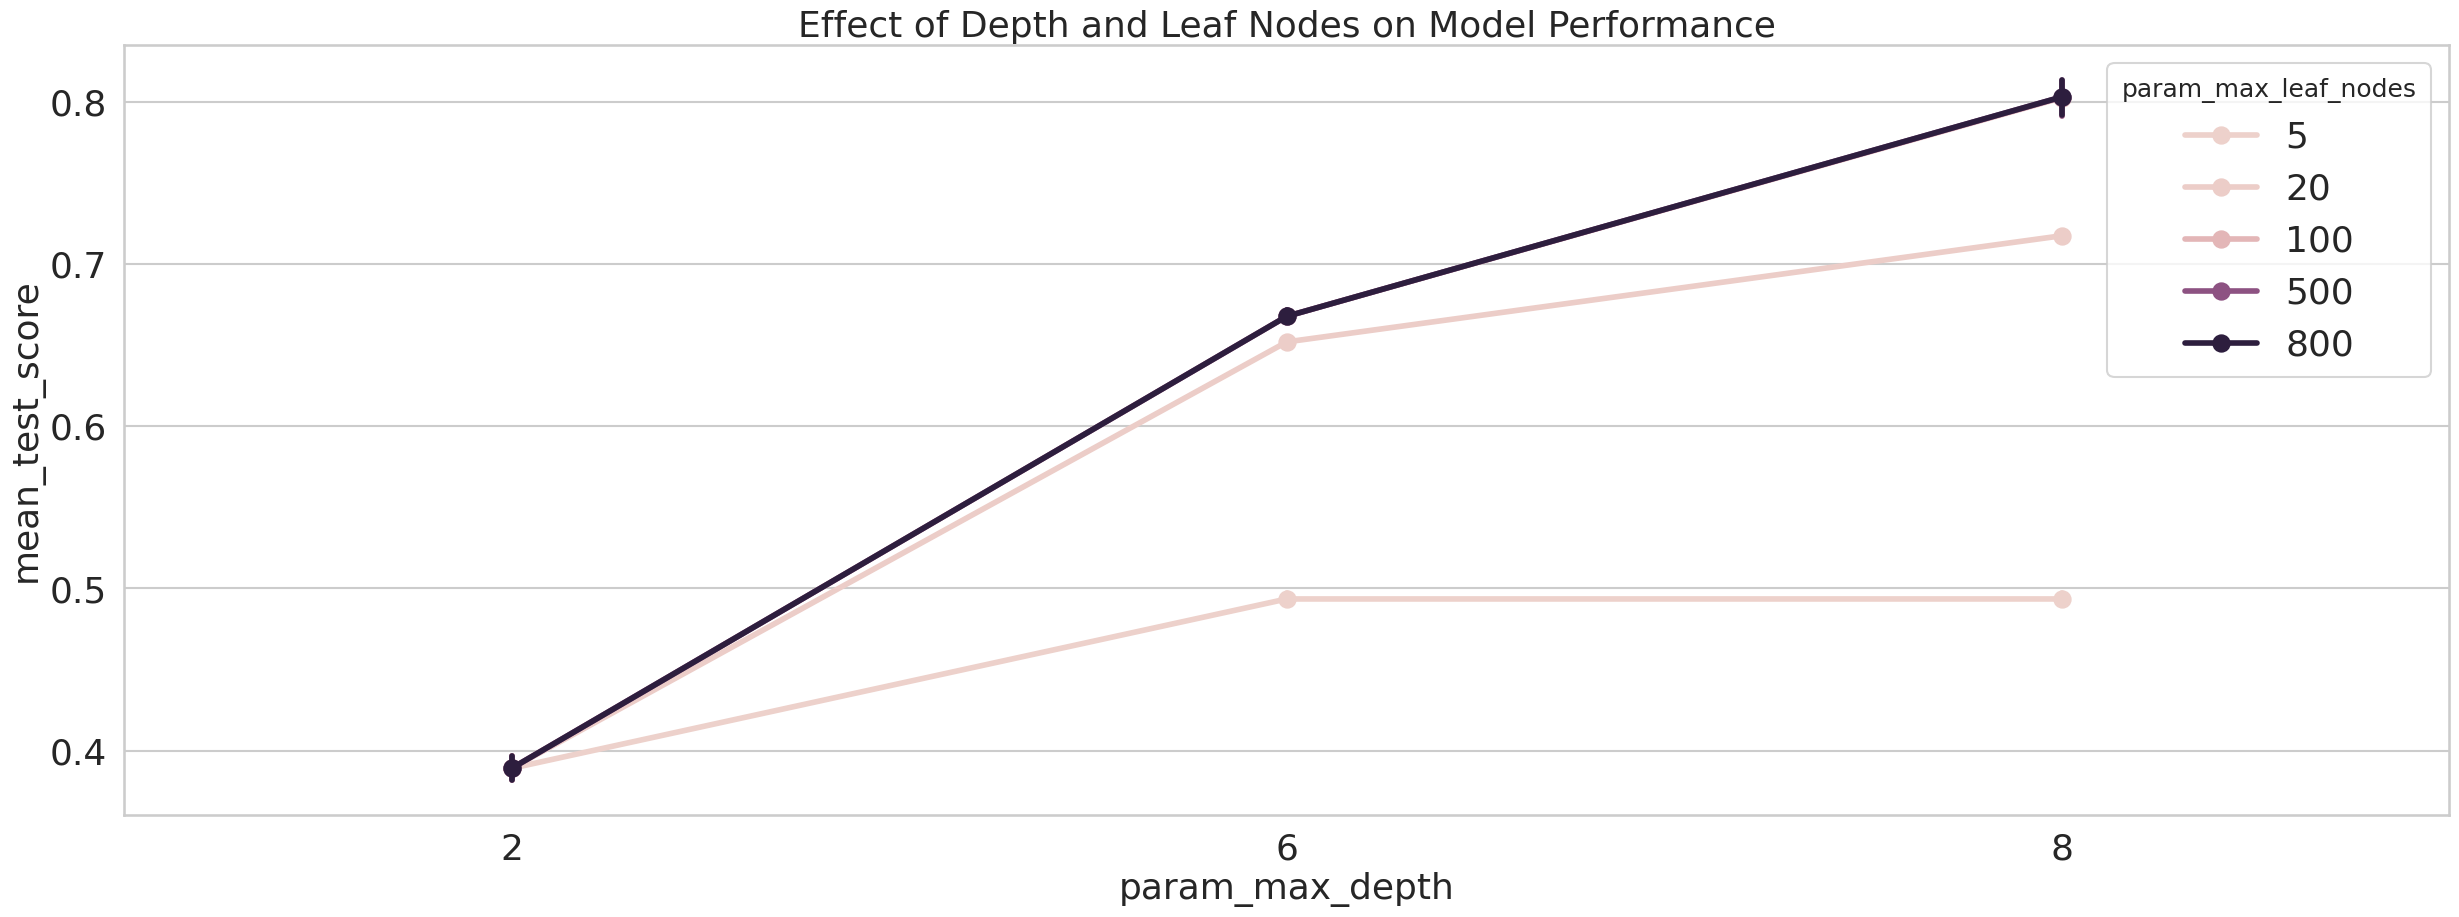

In [203]:
fig,ax = plt.subplots()
sn.pointplot(data=df[['mean_test_score',
                           'param_max_leaf_nodes',
                           'param_max_depth']],
             y='mean_test_score',x='param_max_depth',
             hue='param_max_leaf_nodes',ax=ax)
ax.set(title="Effect of Depth and Leaf Nodes on Model Performance")

## **Residual Plot**

In [206]:
predicted = grid_cv_dtr.best_estimator_.predict(X)
residuals = y.flatten()-predicted

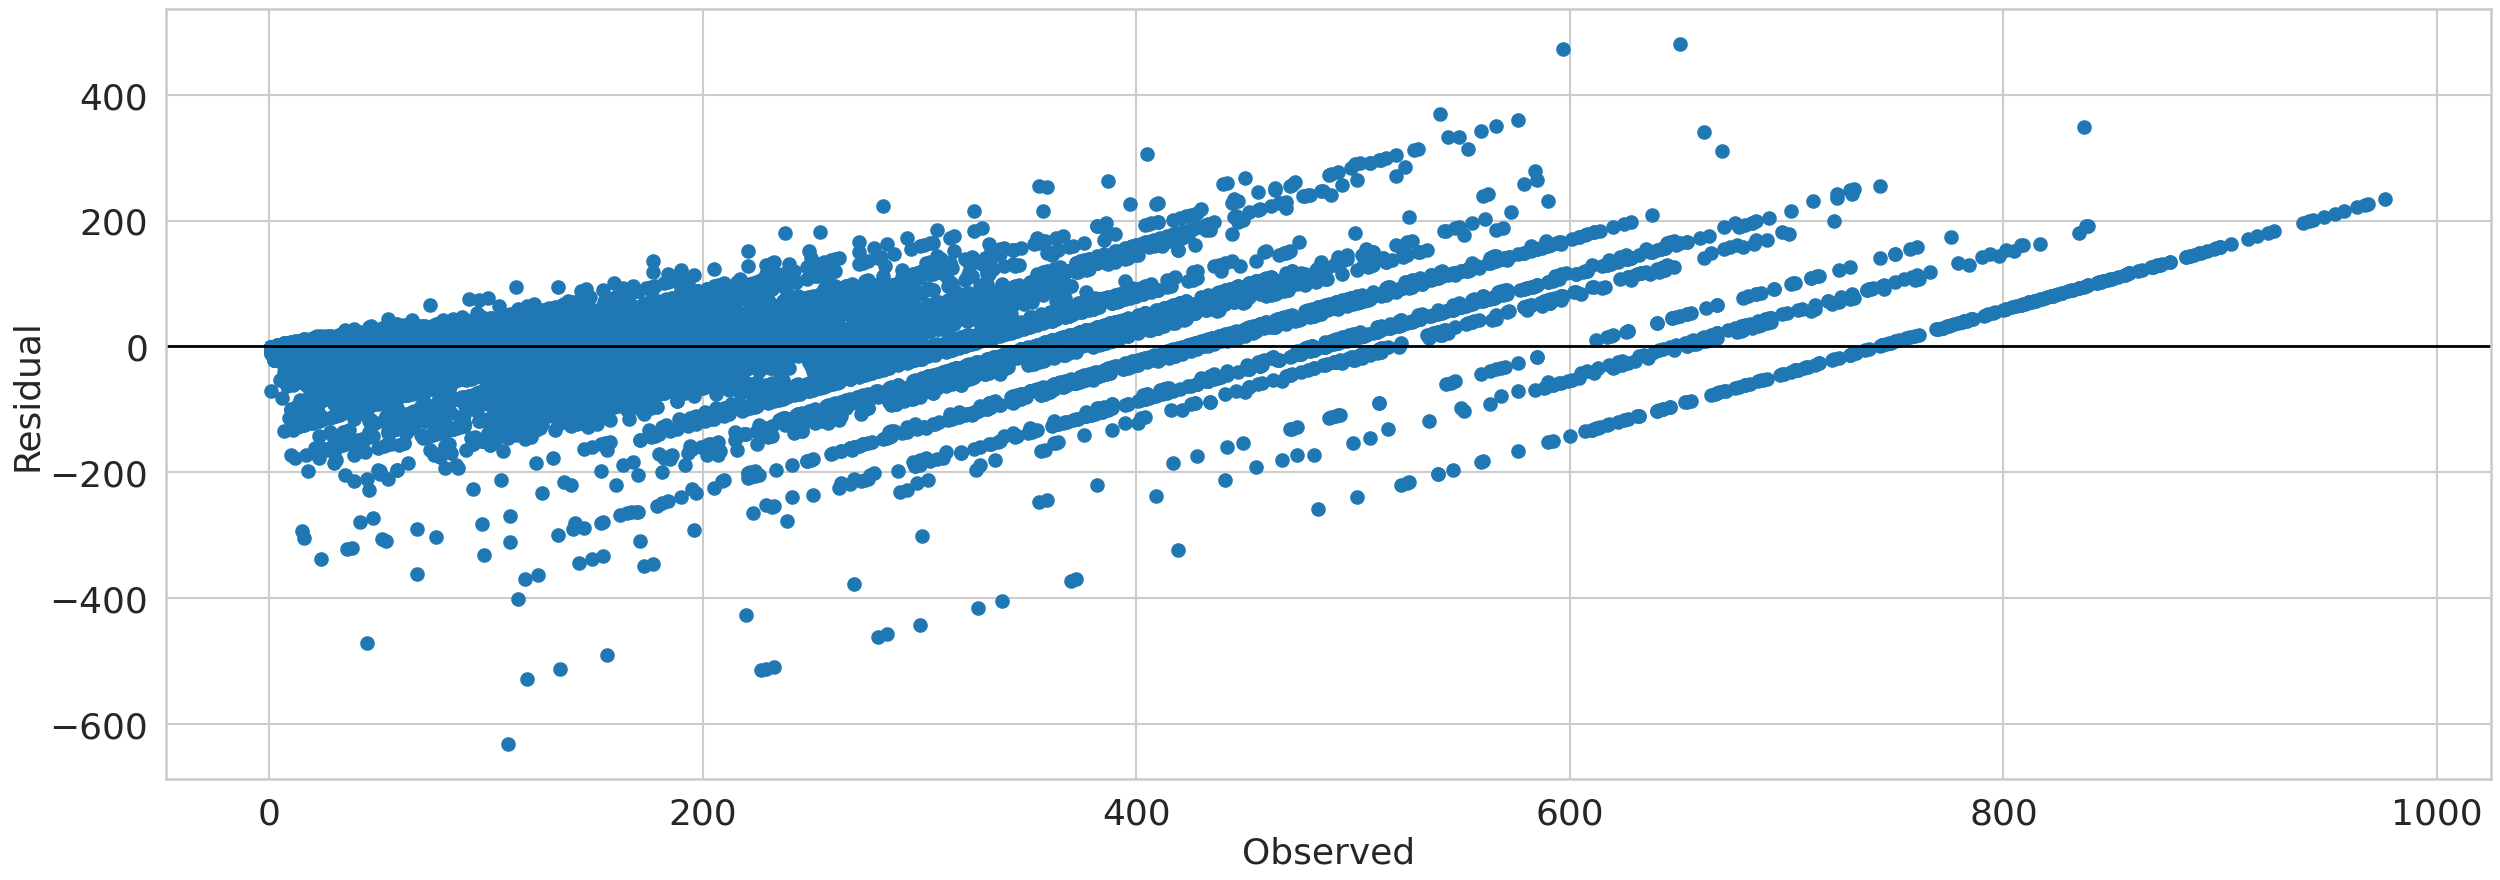

In [208]:
fig, ax = plt.subplots()
ax.scatter(y.flatten(), residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [209]:
r2_scores = cross_val_score(grid_cv_dtr.best_estimator_, X, y, cv=10)
mse_scores = cross_val_score(grid_cv_dtr.best_estimator_, X, y, cv=10,scoring='neg_mean_squared_error')

In [211]:
print("avg R-squared::{}".format(np.mean(r2_scores)))
print("MSE::{}".format(np.mean(mse_scores)))

avg R-squared::0.8375948069484194
MSE::-5406.524080066271


## **Menetapkan model untuk Pengujian**

In [212]:
best_dtr_model = grid_cv_dtr.best_estimator_

## **Kinerja Dataset Uji**

In [213]:
test_encoded_attr_list = []
for enc in encoded_attr_list:
    col_name = enc['col_name']
    le = enc['label_enc']
    ohe = enc['ohe_enc']
    # Check if col_name exists in X_test before proceeding
    if col_name in X_test.columns:
        test_encoded_attr_list.append({'feature_df':transform_ohe(X_test,le,ohe,col_name),
                                       'col_name':col_name})
    else:
        print(f"Warning: Column '{col_name}' not found in X_test. Skipping encoding.") # Print warning if column not found


test_feature_df_list = [X_test[numeric_feature_cols]]
test_feature_df_list.extend([enc['feature_df'] for enc in test_encoded_attr_list if enc['col_name'] in subset_cat_features])
test_df_new = pd.concat(test_feature_df_list, axis=1)
print("Shape::{}".format(test_df_new.shape))

Shape::(5736, 19)


In [214]:
X_test = test_df_new
y_test = y_test.total_count.values.reshape(-1,1)

In [217]:
y_pred = best_dtr_model.predict(X_test)
residuals = y_test.flatten() - y_pred

In [218]:
r2_score = best_dtr_model.score(X_test,y_test)
print("R-squared::{}".format(r2_score))
print("MSE: %.2f"
      % metrics.mean_squared_error(y_test, y_pred))

R-squared::0.8478415542500741
MSE: 4854.08


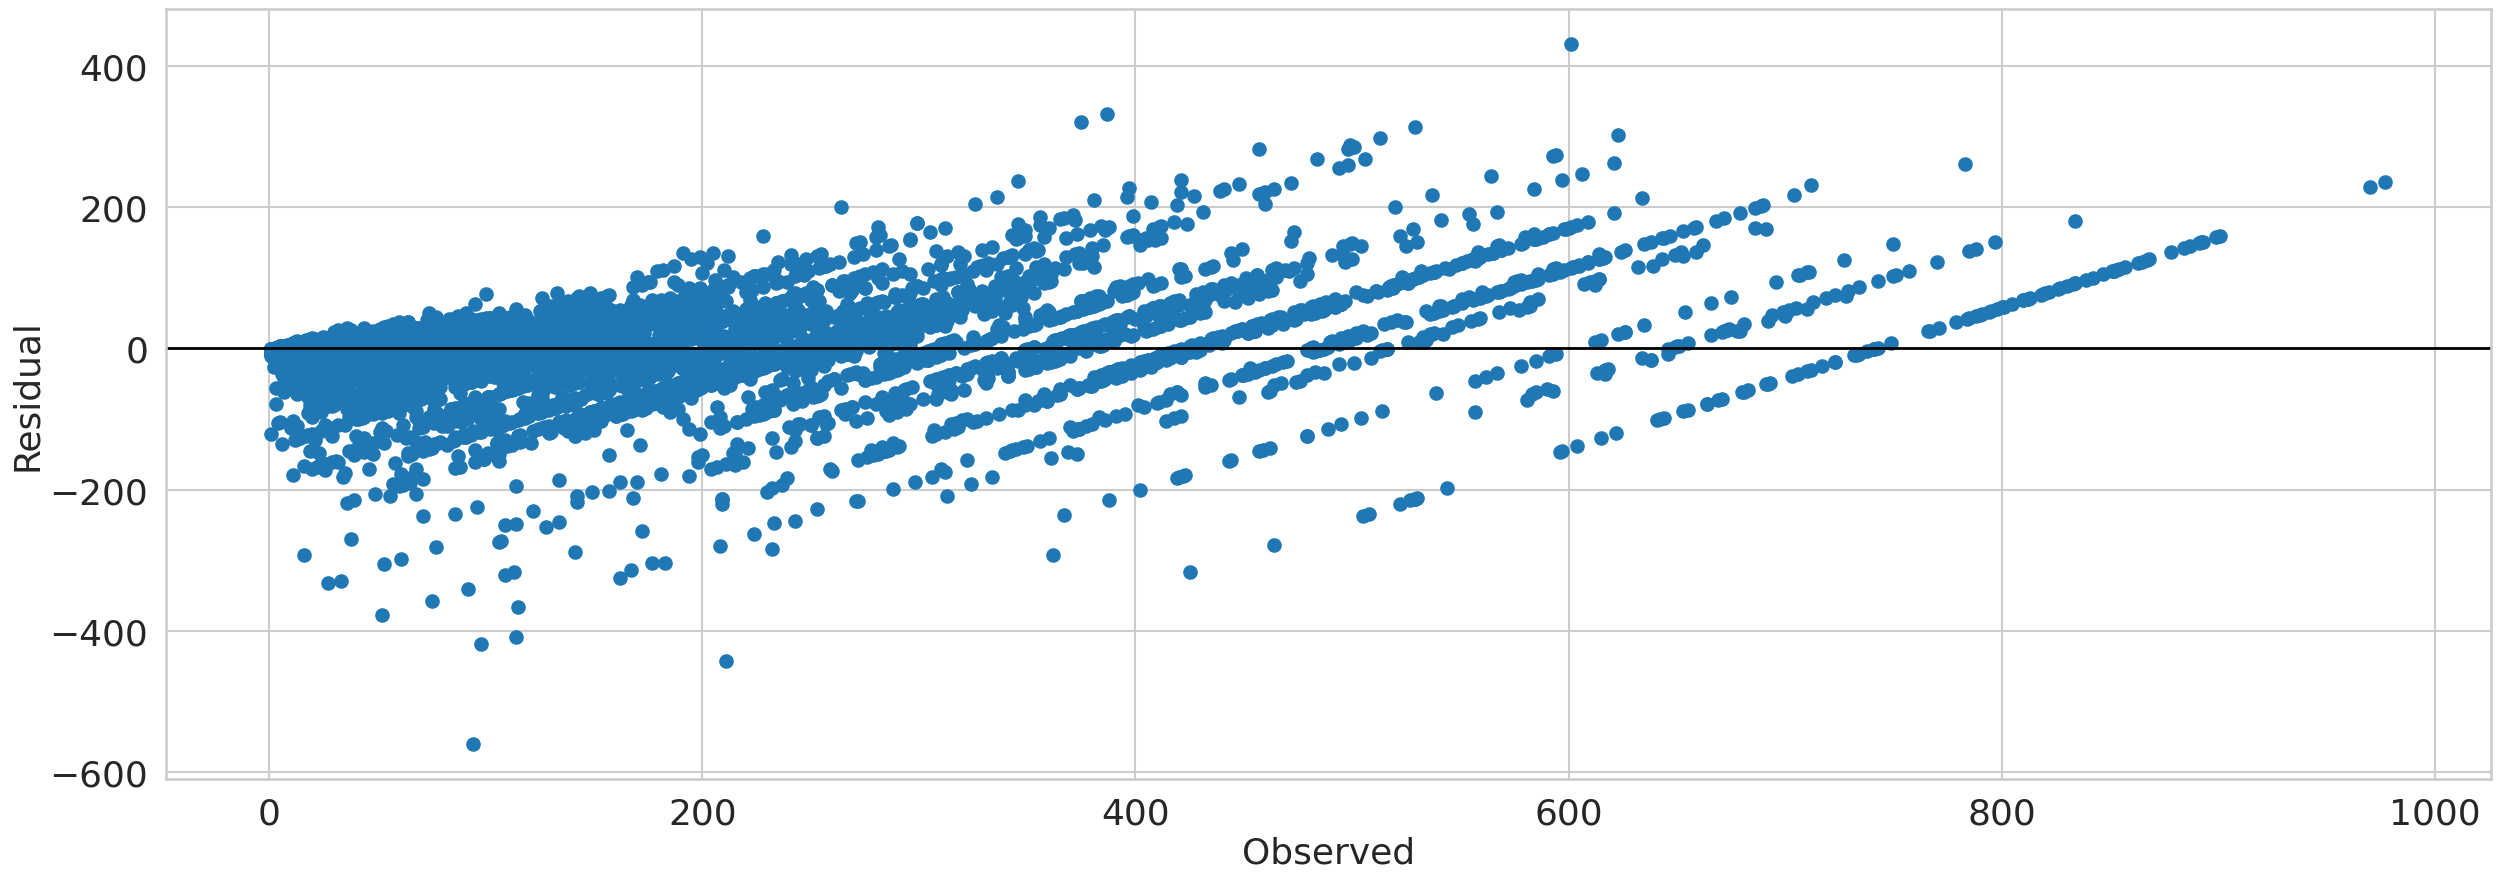

In [219]:
fig, ax = plt.subplots()
ax.scatter(y_test.flatten(), residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()
r2_score = grid_cv_dtr.best_estimator_.score(X_test,y_test)